
# <span style="color:rgb(213,80,0)">Evaluación de las capacidades de robot Scara</span>

Por Islas Escobar Alejandro y Mujica Zeballos Carla


La creciente implementación de robots industriales en tareas que exigen alta velocidad y precisión ha convertido al análisis y optimización de trayectorias en un área crítica de la robótica. Entre los distintos tipos de robots, los robots SCARA (Selective Compliance Assembly Robot Arm) destacan por su configuración cinemática especializada en movimientos rápidos y precisos dentro de un plano, complementados con un movimiento vertical para cambiar el plano. La capacidad de estos robots para seguir una trayectoria compleja no depende únicamente de su programación, sino fundamentalmente de sus características mecánicas, cinemáticas y dinámicas inherentes.


Evaluar esta capacidad implica ir más allá de la simple observación del movimiento. Es necesario realizar un análisis cuantitativo que determine los límites de desempeño del robot, identificando configuraciones donde su destreza y fuerza se ven comprometidas. En este contexto, el índice de manipulabilidad emerge como una herramienta matemática fundamental. Este índice permite cuantificar de manera escalar la habilidad del robot para moverse y aplicar fuerzas en distintas direcciones desde una posición dada. El valor del índice procede de la matriz Jacobiana que relaciona las velocidades de las articulaciones del robot con las velocidades del efector final, un valor bajo de manipulabilidad indica que se está cerca a una singularidad cinemática, donde el robot pierde capacidades para que pueda seguir trayectoria.

## Resumen

El objetivo central de este trabajo es realizar una evaluación de las capacidades de un robot SCARA para el seguimiento óptimo de trayectorias. Esta evaluación se estructura en dos pilares analíticos principales: en primer lugar, evaluar las capacidades cinemáticas mediante el cálculo y análisis del índice de manipulabilidad a lo largo de la trayectoria objetivo. En segundo lugar, determinar las características  de potencia de los actuadores del robot, lo que implica calcular los perfiles  torque y potencia requeridos en cada articulación para ejecutar la trayectoria especificada.  Este análisis dinámico es crucial para verificar que los actuadores puedan suministrar los pares necesarios sin saturarse, asegurando que el seguimiento sea no solo posible cinemáticamente, sino también factible dinámicamente dentro de los límites mecánicos del sistema.

## Definición de la tarea

Una tarea en un robot se define como la acción de llevar su efector final de un punto inicial a un segundo punto final, para ello se declaran las posiciones de  ambos puntos, se propone un movimiento en el que solo se desplaza en un solo plano.


In [1]:
% Definición de los puntos
% Pose inicial
x_in = 0.5;
y_in = 0.3;
theta_in = 0;
% Pose final
x_fin = 0.7;
y_fin = 0.8;
theta_fin = pi/2;


### Definición de la tarea en el espacio de las juntas

Para calcular la planeación de movimientos en el espacio de las juntas se requiere cálculos la postura de cada eslabón en punto inicial y en punto final. Se considera la longitud de cada parte del robot y un planteamiento de la solución de la posición por el método geométrico, utilizando ley de consenos.


In [2]:
% Cálculo de la solución de la primer postura

% Definición de los parámetros del robot
L1 = 0.5; % Longitud del primer eslabón
L2 = 0.5; % Longitud del segundo eslabón
L3 = 0.25; % Longitud del tercer eslabón

% Planteamiento de la solución

x_3 = x_in - L3*cos(theta_in);
y_3 = y_in - L3*sin(theta_in);

% Solucion por le método geométrico

theta_2_in = acos((x_3^2+y_3^2-L1^2-L2^2)/(2*L1*L2))

theta_2_in = 2.3392

In [3]:

beta = atan2(y_3,x_3);

psi = acos((x_3^2+y_3^2+L1^2-L2^2)/(2*L1*sqrt(x_3^2+y_3^2)));

%Se utiliza la expresión beta + psi para la primera solución
theta_1_in = beta + psi

theta_1_in = 2.0457

In [4]:
% theta_1_in = beta - psi

theta_3_in = theta_in -theta_1_in - theta_2_in

theta_3_in = -4.3849

In [5]:
%%%
%% Solucion para el punto final
x_3 = x_fin - L3*cos(theta_fin);
y_3 = y_fin - L3*sin(theta_fin);

% Solucion por le método geométrico

theta_2_fin = acos((x_3^2+y_3^2-L1^2-L2^2)/(2*L1*L2))

theta_2_fin = 0.9459

In [6]:

beta = atan2(y_3,x_3);

psi = acos((x_3^2+y_3^2+L1^2-L2^2)/(2*L1*sqrt(x_3^2+y_3^2)));

%Se utiliza la expresión beta + psi para la primera solución
theta_1_fin = beta + psi

theta_1_fin = 1.1389

In [7]:
theta_3_fin = theta_fin -theta_1_fin - theta_2_fin

theta_3_fin = -0.5140


## Planteamiento de una trayectoria en el espacio de las juntas del robot

Para ejecutar un movimiento entre dos puntos, el robot debe transitar a través de una serie de configuraciones intermedias definidas por sus coordenadas articulares. Una vez definidas las configuraciones articulares inicial y final, es necesario especificar la evolución temporal de cada variable articular. La trayectoria articular se define mediante una función de interpolación $\lambda \left(t\right)$, que depende del tiempo final de la trayectoria y gobierna la transición entre los puntos inicial y final. La posición articular en cada instante de tiempo se define de la siguiente forma:


Definición de la trayectoria


$$q =q_i +\lambda \left(t\right)\left(q_{\textrm{fin}} -q_{\textrm{in}} \right)$$

In [8]:
%Se define un tiempo de desplazamiento de 10 segundos
tf = 10;



Para garantizar un movimiento suave que minimice los esfuerzos dinámicos sobre los actuadores y la estructura, se implementa un perfil de interpolación polinómico de quinto grado. Este perfil va incrementando conforme pasa el tiempo y determina el valor en cada instante de las juntas del robot.


In [9]:
for i=1:tf+1
    t = i; %Se incrementa el tiempo por cada iteración
    theta_1_P(i) = theta_1_in + ((10/tf^3)*t^3 - (15/tf^4)*t^4 + (6/tf^5)*t^5)*(theta_1_fin-theta_1_in);
    theta_2_P(i) = theta_2_in + ((10/tf^3)*t^3 - (15/tf^4)*t^4 + (6/tf^5)*t^5)*(theta_2_fin-theta_2_in);
    theta_3_P(i) = theta_3_in + ((10/tf^3)*t^3 - (15/tf^4)*t^4 + (6/tf^5)*t^5)*(theta_3_fin-theta_3_in);
end


Para tener una visualización de la configuración de las juntas a lo largo de la trayectoria, se presenta la siguiente gráfica en el tiempo del seguimiento de la trayectoria:



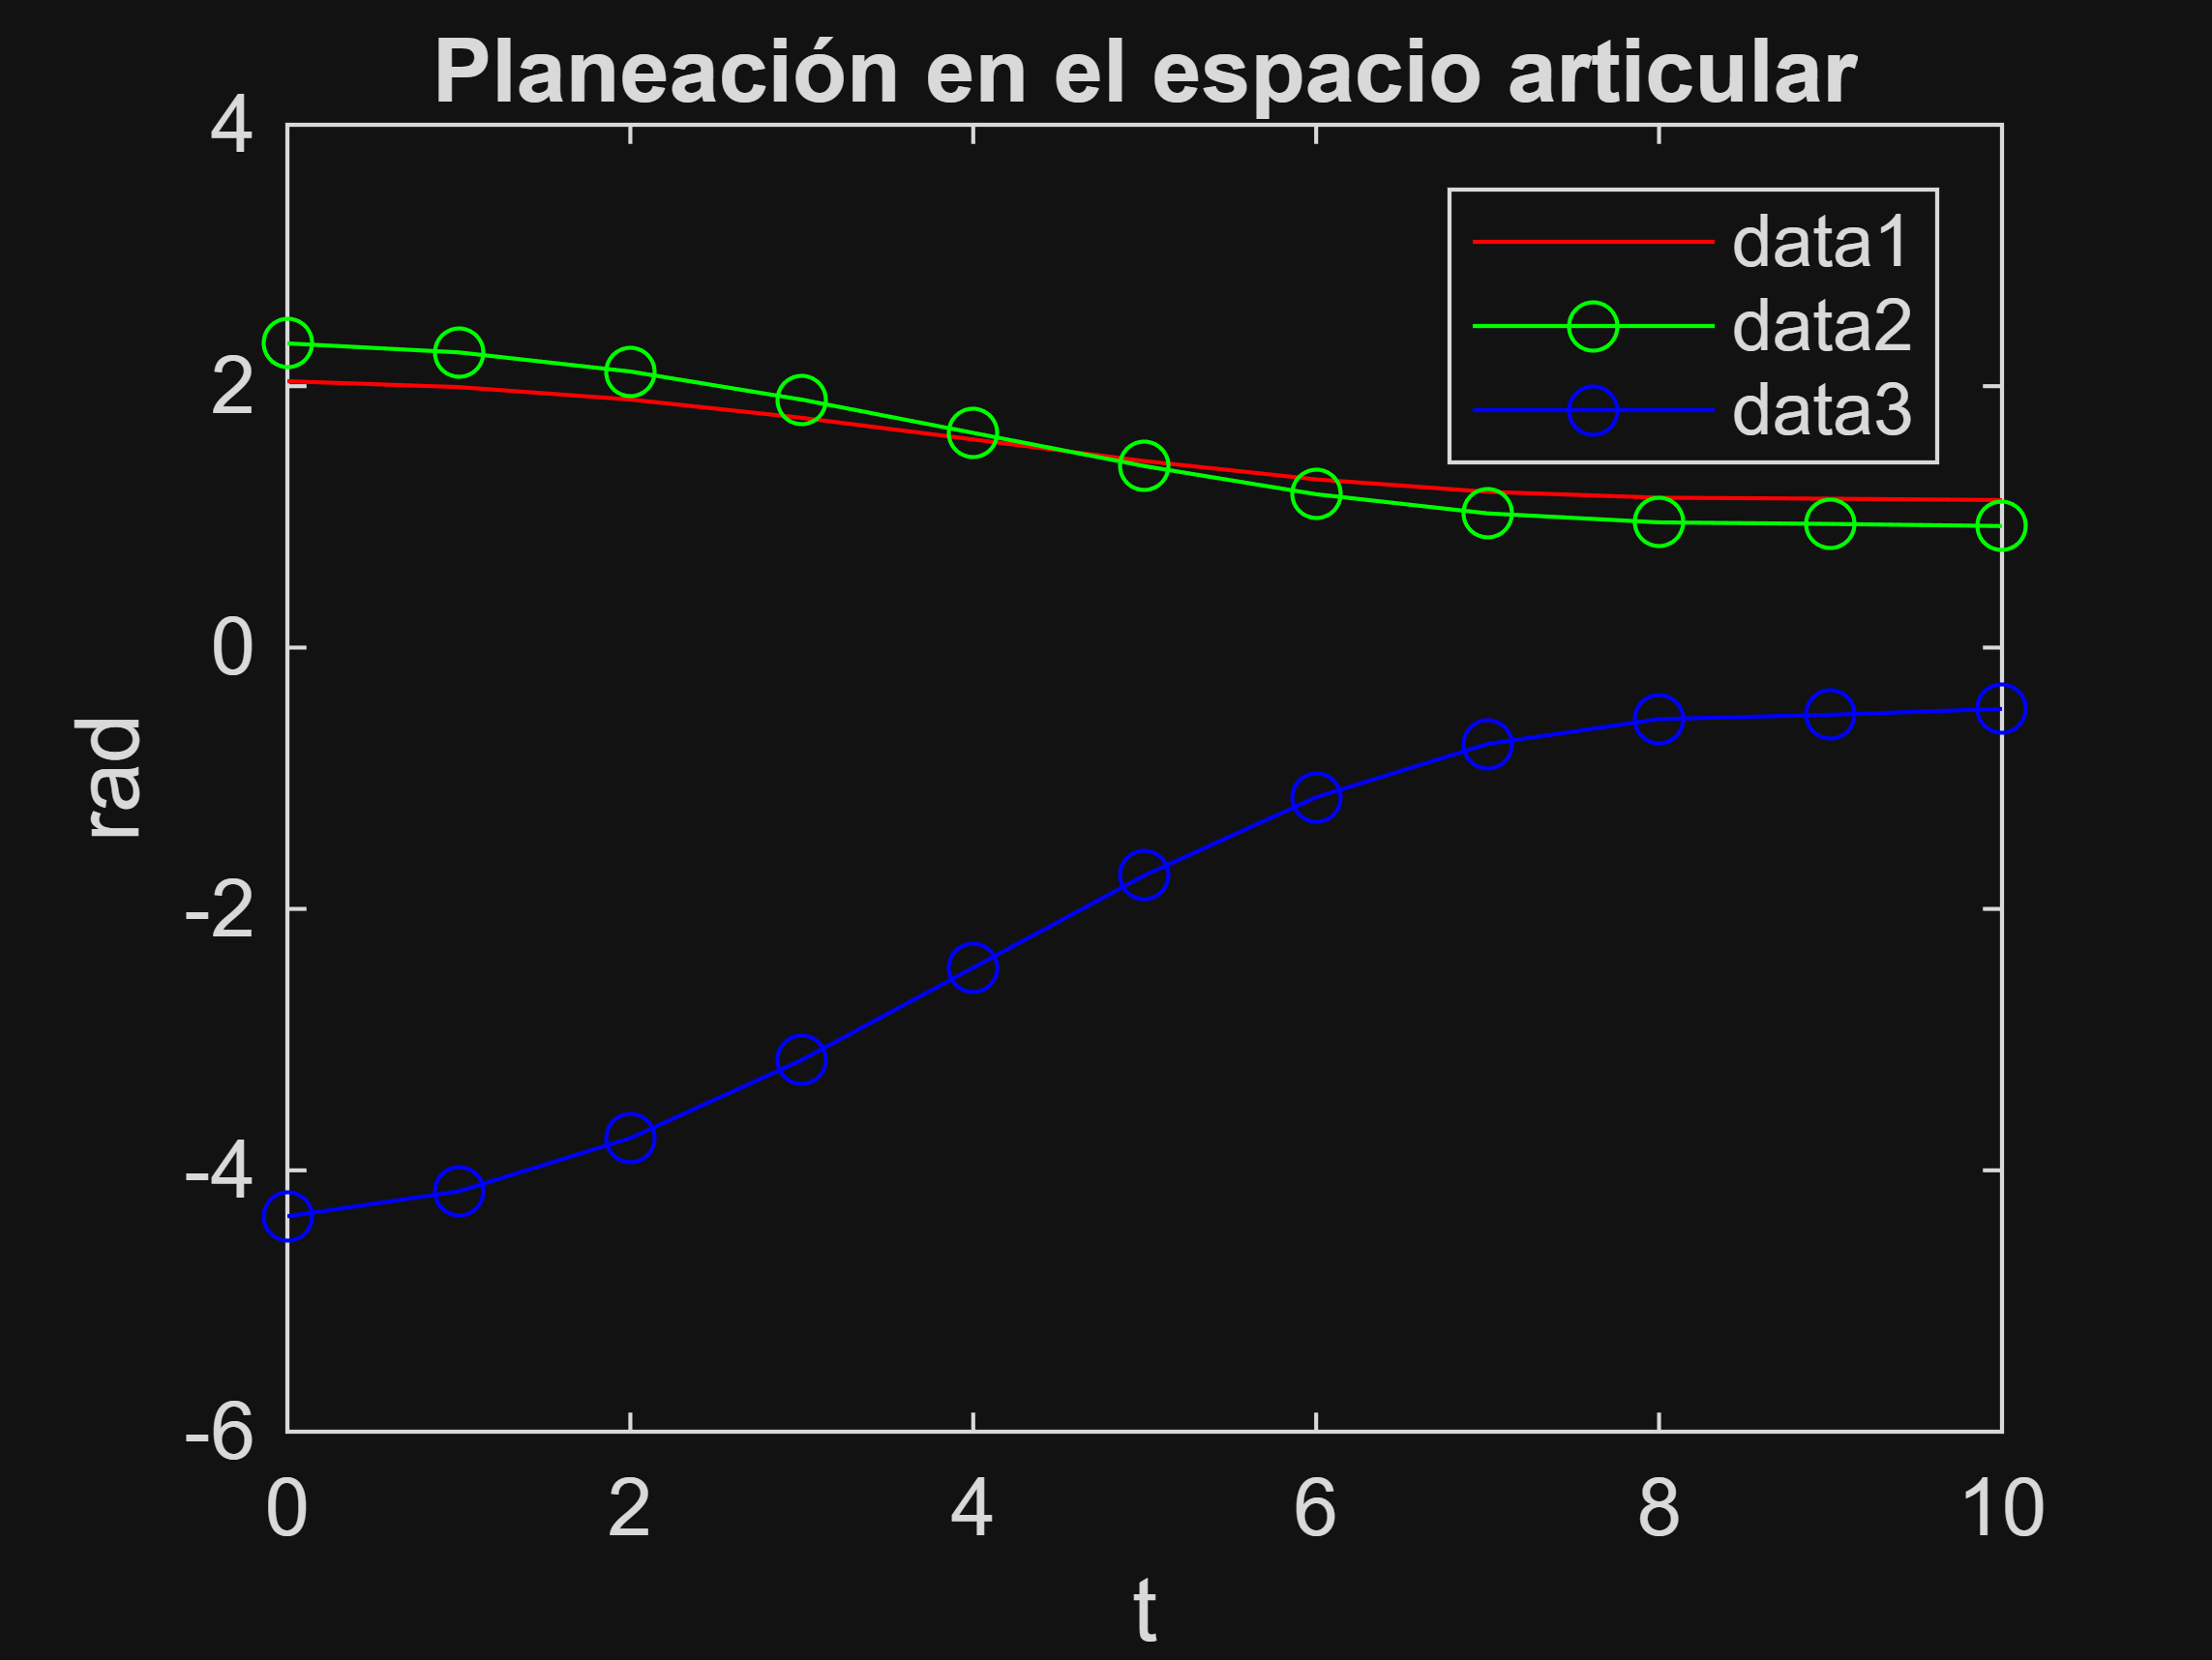

In [10]:
tsim=0:1:tf;
figure;

plot(tsim, theta_1_P, 'r-');
hold on;
plot(tsim, theta_2_P, 'g-o');
plot(tsim, theta_3_P, 'b-o');

hold off;

xlim([0.00 10.00])
ylim([-6.0 4.0])
legend
title("Planeación en el espacio articular")
xlabel("t")
ylabel("rad")


Podemos observar que el desplazamiento tiene un comportamiento suave y transiciona sin cambios bruscos en él. Así mismo, vemos que el rango de movimiento de las primeras dos juntas un muy pequeño, facilitando así el cambio en la velocidad y aceleración del robot.

## Planeación de trayectoria en el espacio de trabajo del robot

Una vez que hemos declarado la trayectoria en las juntas podemos conocer la pose del robot en cada momento de tiempo, por cada instante del tiempo se resuelve de por métodos geométricos y se calcula la posición del efector final.


In [11]:
% Cálculo de la solución en cada instante de tiempo
tf = 10;
for i=1:tf+1
    t = i;
    x_P(i) = x_in + ((10/tf^3)*t^3 - (15/tf^4)*t^4 + (6/tf^5)*t^5)*(x_fin-x_in);
    y_P(i) = y_in + ((10/tf^3)*t^3 - (15/tf^4)*t^4 + (6/tf^5)*t^5)*(y_fin-y_in);
    theta_P(i) = theta_in + ((10/tf^3)*t^3 - (15/tf^4)*t^4 + (6/tf^5)*t^5)*(theta_fin-theta_in);

    x_3_a(i) = x_P(i) - L3*cos(theta_P(i));
    y_3_a(i) = y_P(i) - L3*sin(theta_P(i));

    % Solucion por le metodo geométrico

    theta_2_tray(i) = acos((x_3_a(i)^2+y_3_a(i)^2-L1^2-L2^2)/(2*L1*L2));

    beta = atan2(y_3_a(i),x_3_a(i));

    psi = acos((x_3_a(i)^2+y_3_a(i)^2+L1^2-L2^2)/(2*L1*sqrt(x_3_a(i)^2+y_3_a(i)^2)));

    %Se utiliza la expresión beta + psi para la primera solución
    theta_1_tray(i) = beta + psi;

    theta_3_tray(i) = theta_P(i) - theta_1_tray(i) - theta_2_tray(i);
end


De igual forma, se presenta una gráfica para tener una mejor interpretación del movimiento y planeación en el espacio de trabajo. En ella observamos igual una variación fluida de la posición, sin cambios bruscos que forcen los actuadores.



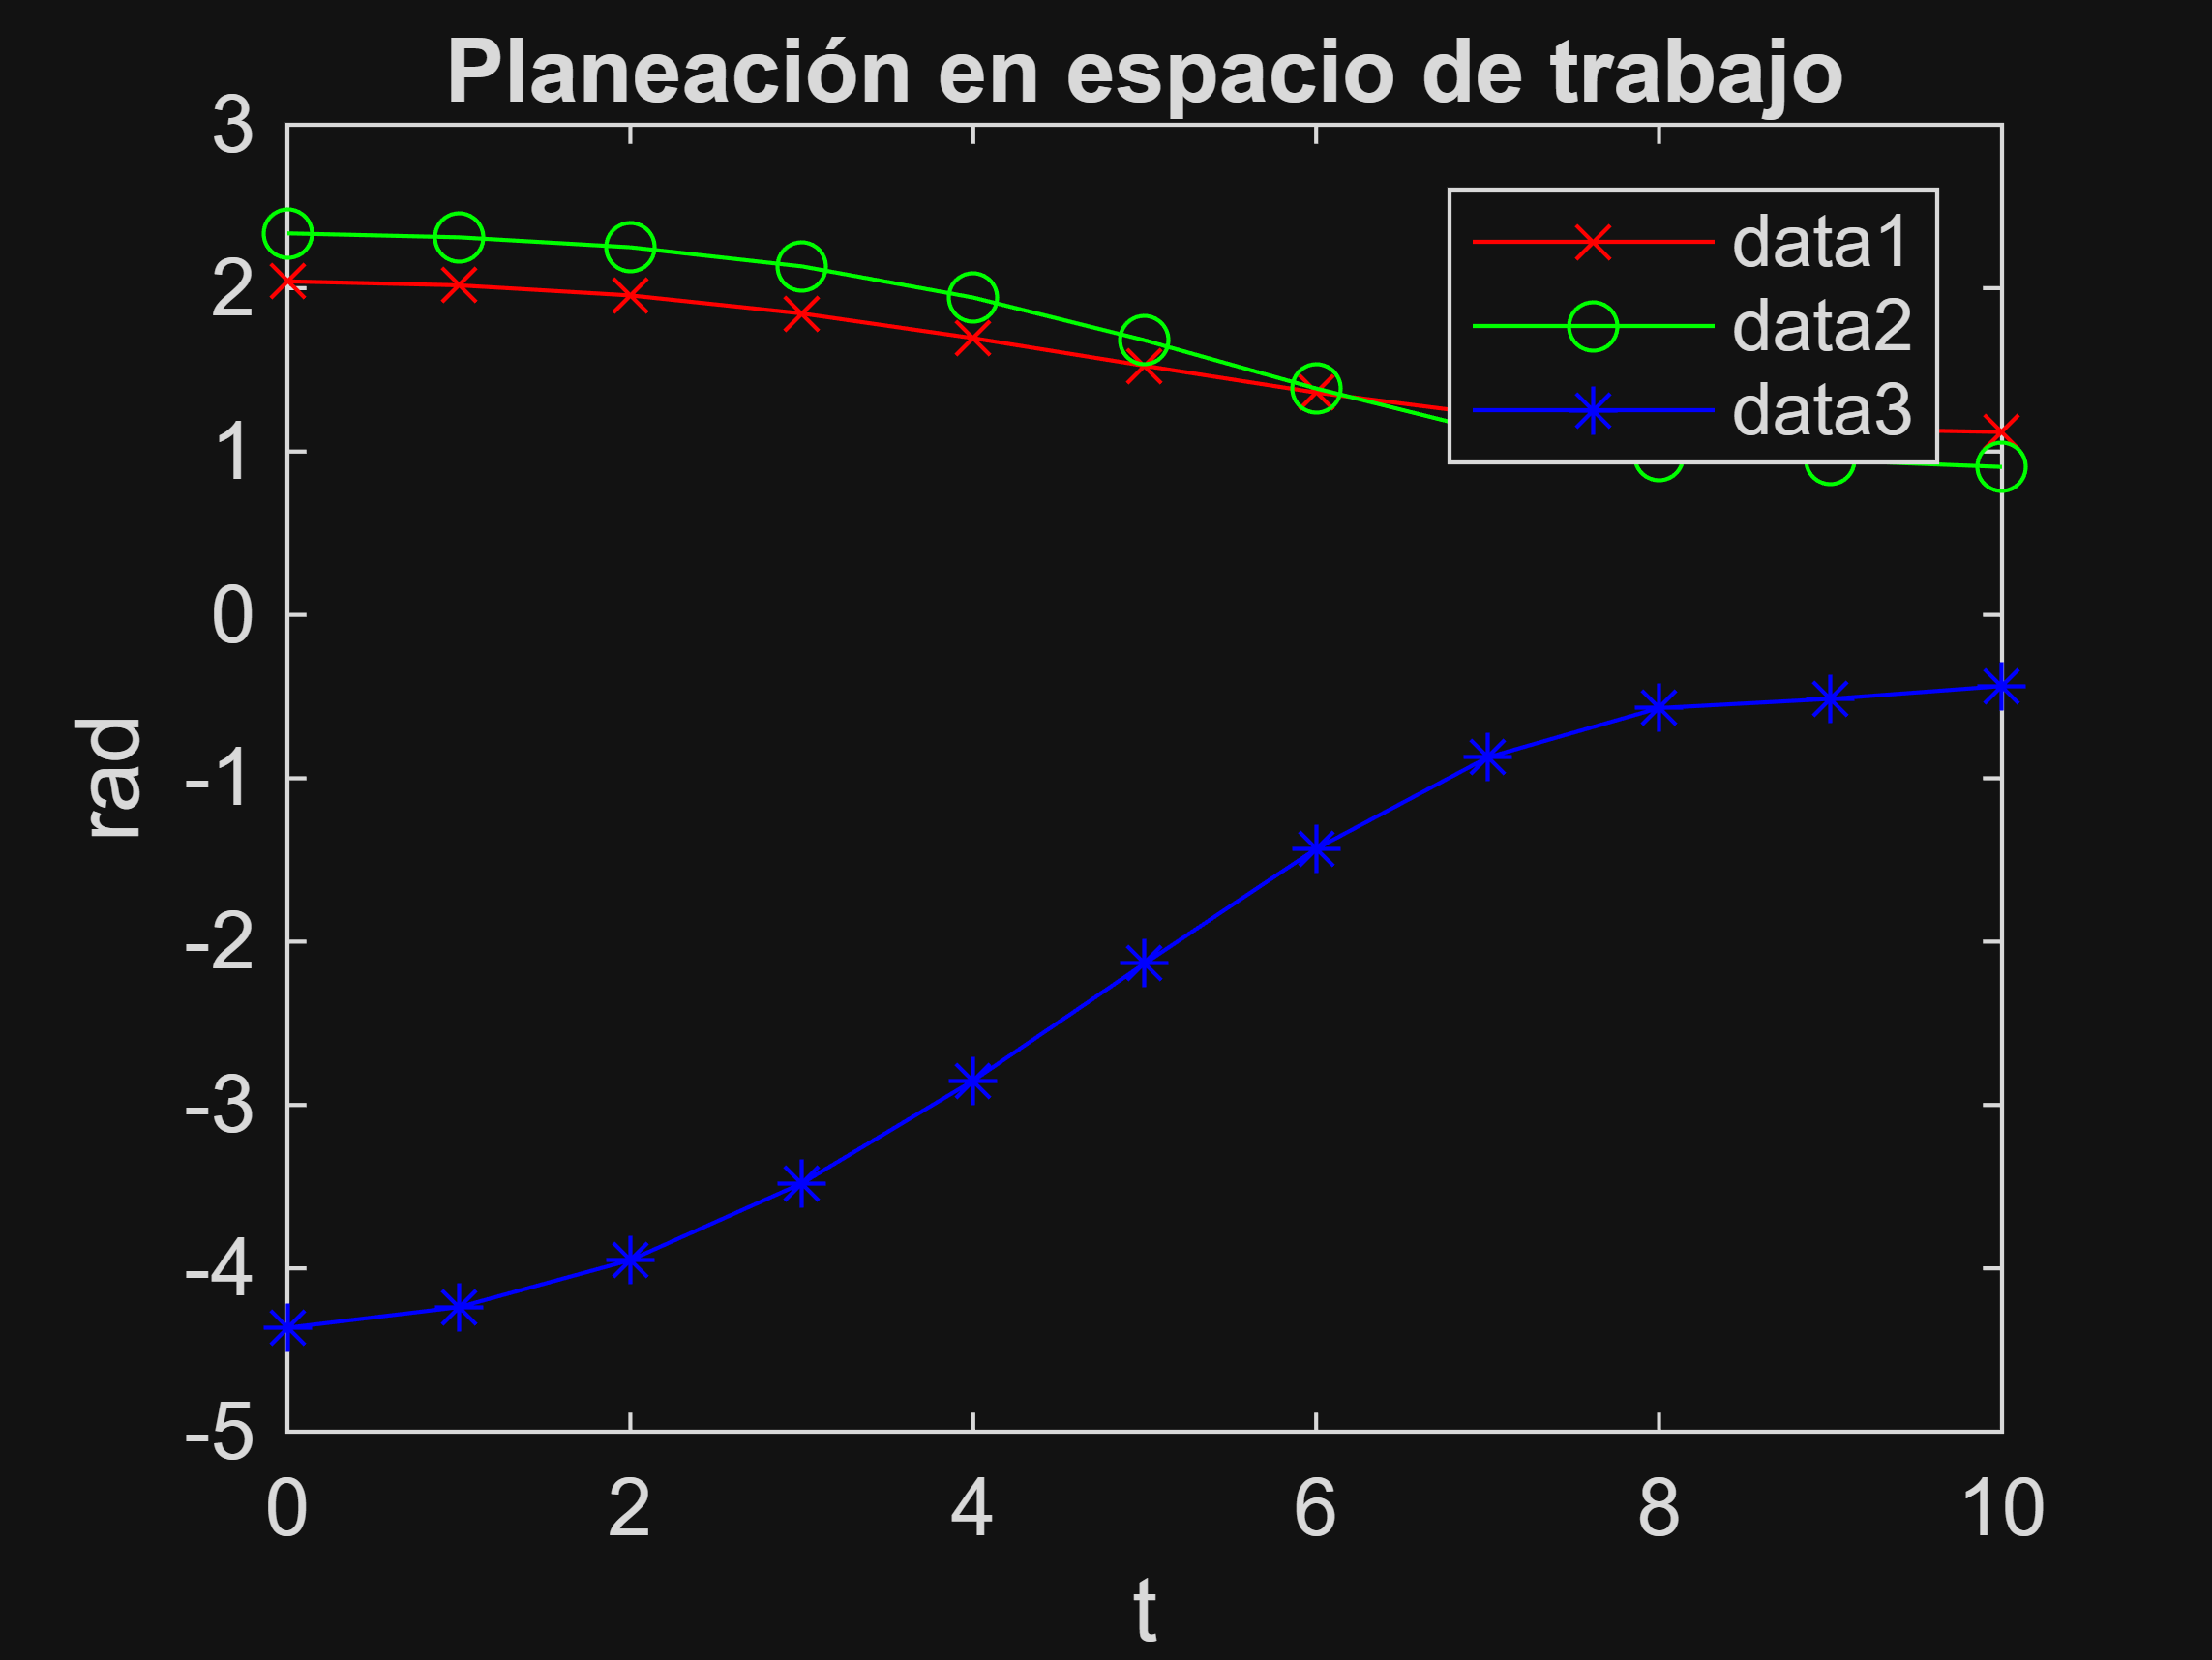

In [12]:
tsim=0:1:tf;
figure;

plot(tsim, theta_1_tray, 'r-x');
hold on;
plot(tsim, theta_2_tray, 'g-o');
plot(tsim, theta_3_tray, 'b-*');

hold off;

legend
title("Planeación en espacio de trabajo")
xlabel("t")
ylabel("rad")

### Cálculo de la cinemática de velocidades y aceleraciones en el espacio de las juntas del robot

Para obtener las cinemáticas de la velocidad se debe derivar respecto al tiempo la expresión de la posición, debido a que se utilizó un perfil polinómico de quinto grado se espera que la curva de velocidad también tenga un comportamiento suave. En el perfil de comportamiento de la posición se establece un perfil quintuple, esto con el objetivo de asegurar que el robot tenga como condición inicial y final con una velocidad 0.


**Cinemática de velocidades en espacio de las juntas**



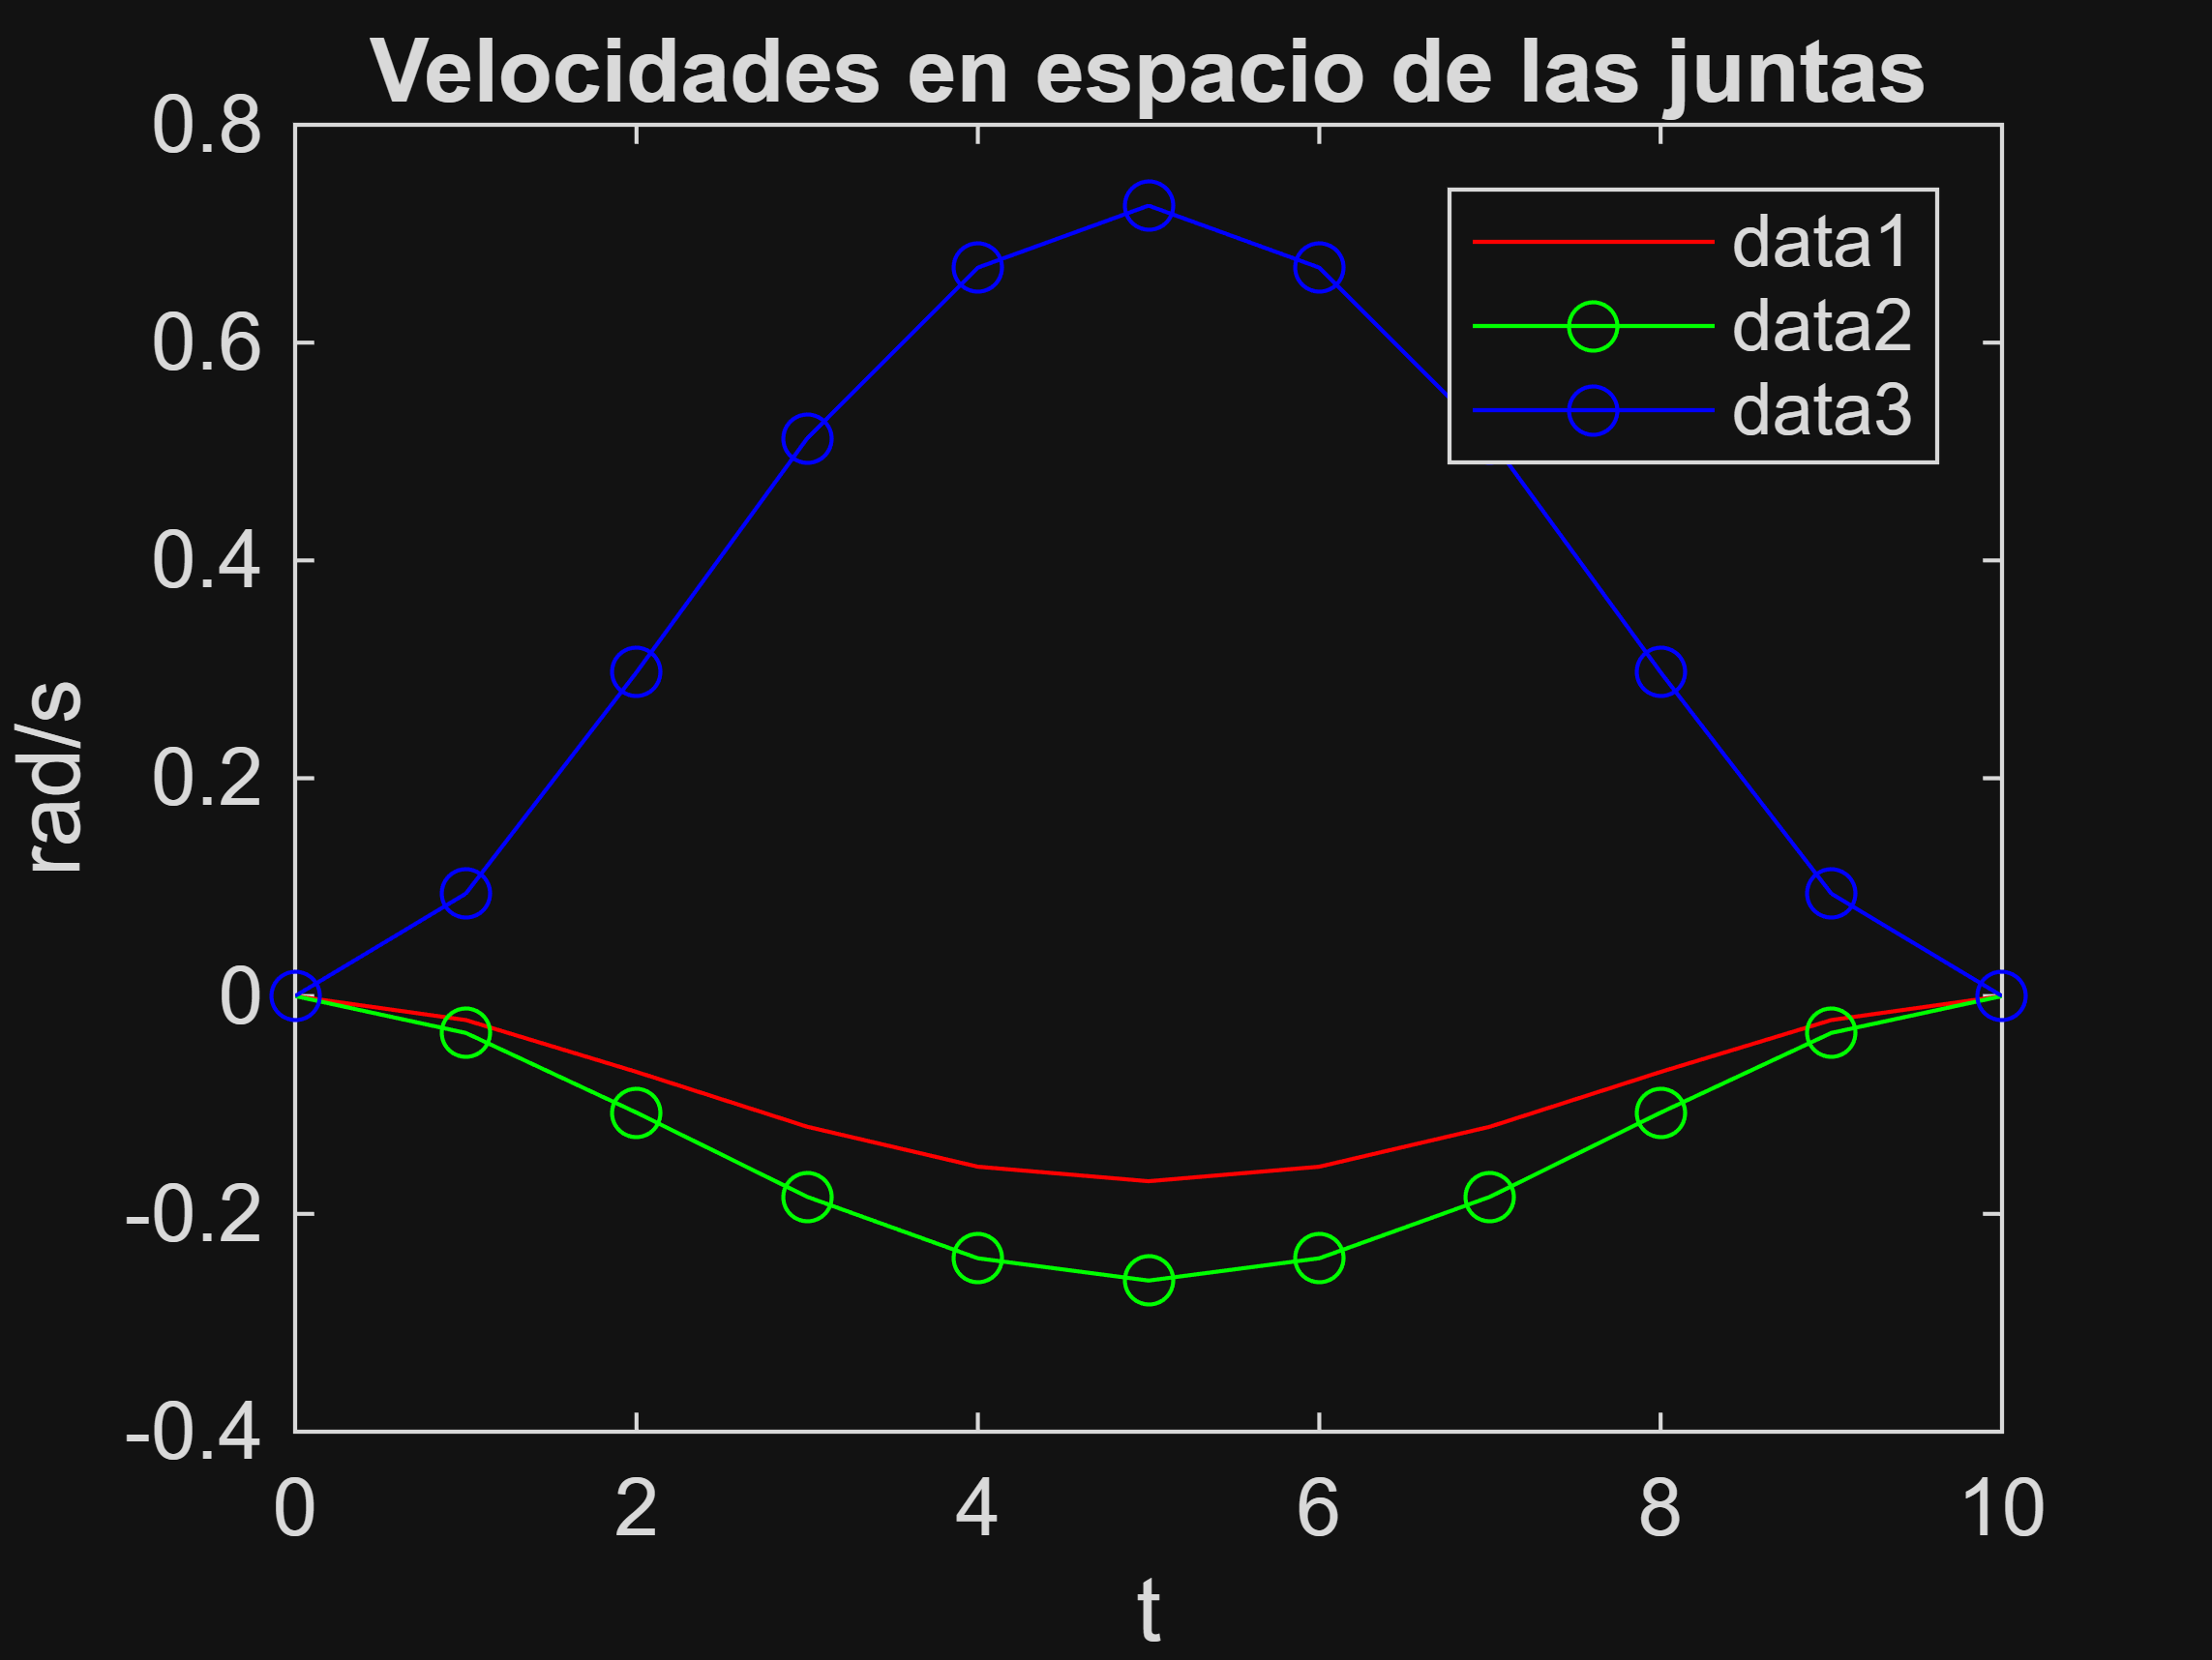

In [13]:
tf = 10;
for i=1:tf+1
    t = i-1;
    %Expresiones de la derivada de cada posición
    theta_1_P_v(i) =  ((30/tf^3)*t^2 - (60/tf^4)*t^3 + (30/tf^5)*t^4)*(theta_1_fin-theta_1_in);
    theta_2_P_v(i) = ((30/tf^3)*t^2 - (60/tf^4)*t^3 + (30/tf^5)*t^4)*(theta_2_fin-theta_2_in);
    theta_3_P_v(i) =  ((30/tf^3)*t^2 - (60/tf^4)*t^3 + (30/tf^5)*t^4)*(theta_3_fin-theta_3_in);

end

%Gráfica del comportamiento de las velocidades
figure;
plot(tsim, theta_1_P_v, 'r-');
hold on;
plot(tsim, theta_2_P_v, 'g-o');
plot(tsim, theta_3_P_v, 'b-o');

hold off;
legend
title("Velocidades en espacio de las juntas")
xlabel("t")
ylabel("rad/s")


**Cinemática de las aceleraciones en espacio de las juntas**


Para la aceleración en cada junta se obtiene de la derivada respecto al tiempo de las velocidades. Al igual que con las velocidades, se planteó el perfil polinómico de quinto grado considerando igualmente que la aceleración inicial y final es igual a 0 y que no importa la posición inicial, solo la distancia que hay entre la posición inicial y la final.



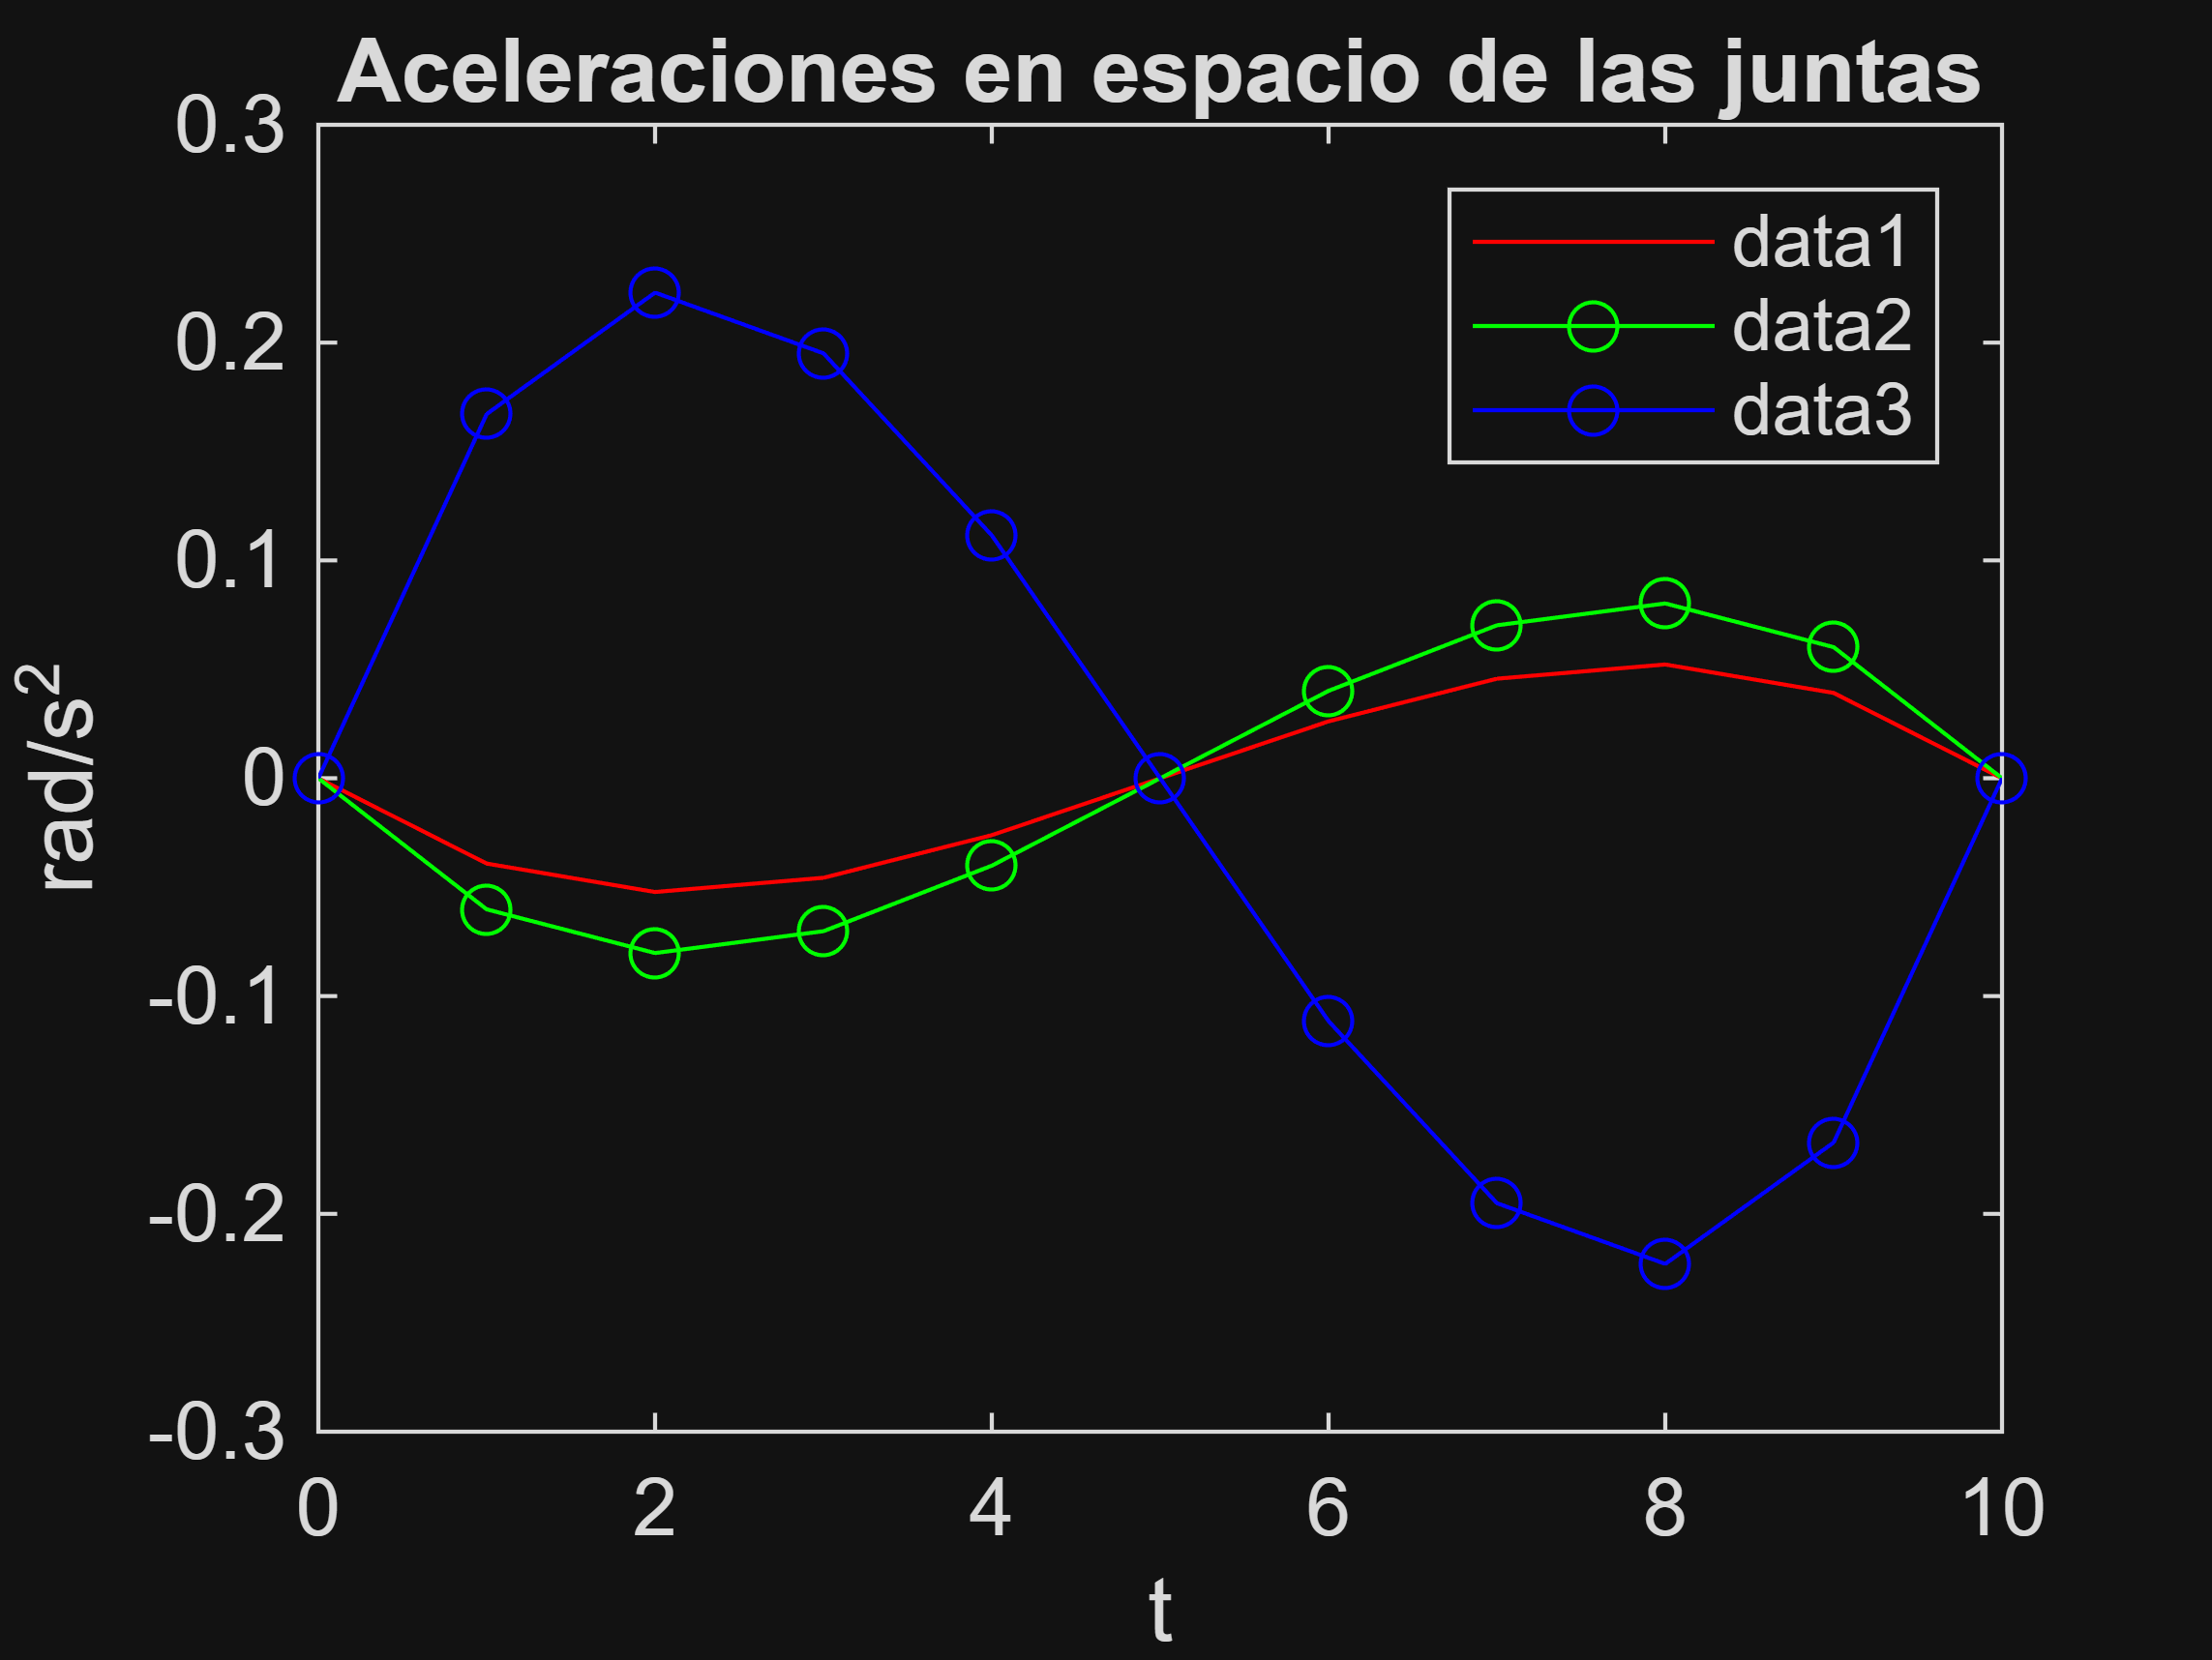

In [14]:
tf = 10;

for i=1:tf+1
    t = i-1;
    %Expresión de las derivadas de cada velocidad
    theta_1_P_a(i) =  ((60/tf^3)*t - (180/tf^4)*t^2 + (120/tf^5)*t^3)*(theta_1_fin-theta_1_in);
    theta_2_P_a(i) = ((60/tf^3)*t - (180/tf^4)*t^2 + (120/tf^5)*t^3)*(theta_2_fin-theta_2_in);
    theta_3_P_a(i) =  ((60/tf^3)*t - (180/tf^4)*t^2 + (120/tf^5)*t^3)*(theta_3_fin-theta_3_in);

end

figure;

plot(tsim, theta_1_P_a, 'r-');
hold on;
plot(tsim, theta_2_P_a, 'g-o');
plot(tsim, theta_3_P_a, 'b-o');

hold off;
legend
title("Aceleraciones en espacio de las juntas")
xlabel("t")
ylabel("rad/s^2")

### Cálculo de la cinemática de velocidades en el espacio de trabajo

De la misma forma que se calcula la velocidad en el espacio de las juntas, se realiza el proceso en el espacio del trabajo. La velocidad del efector final se obtiene con la derivada respecto al tiempo del cambio en la posición del efector. Además de la velocidad del efector final, es necesario considerar los efectos del movimiento del resto de eslabones, también conocida como propagación de velocidades.



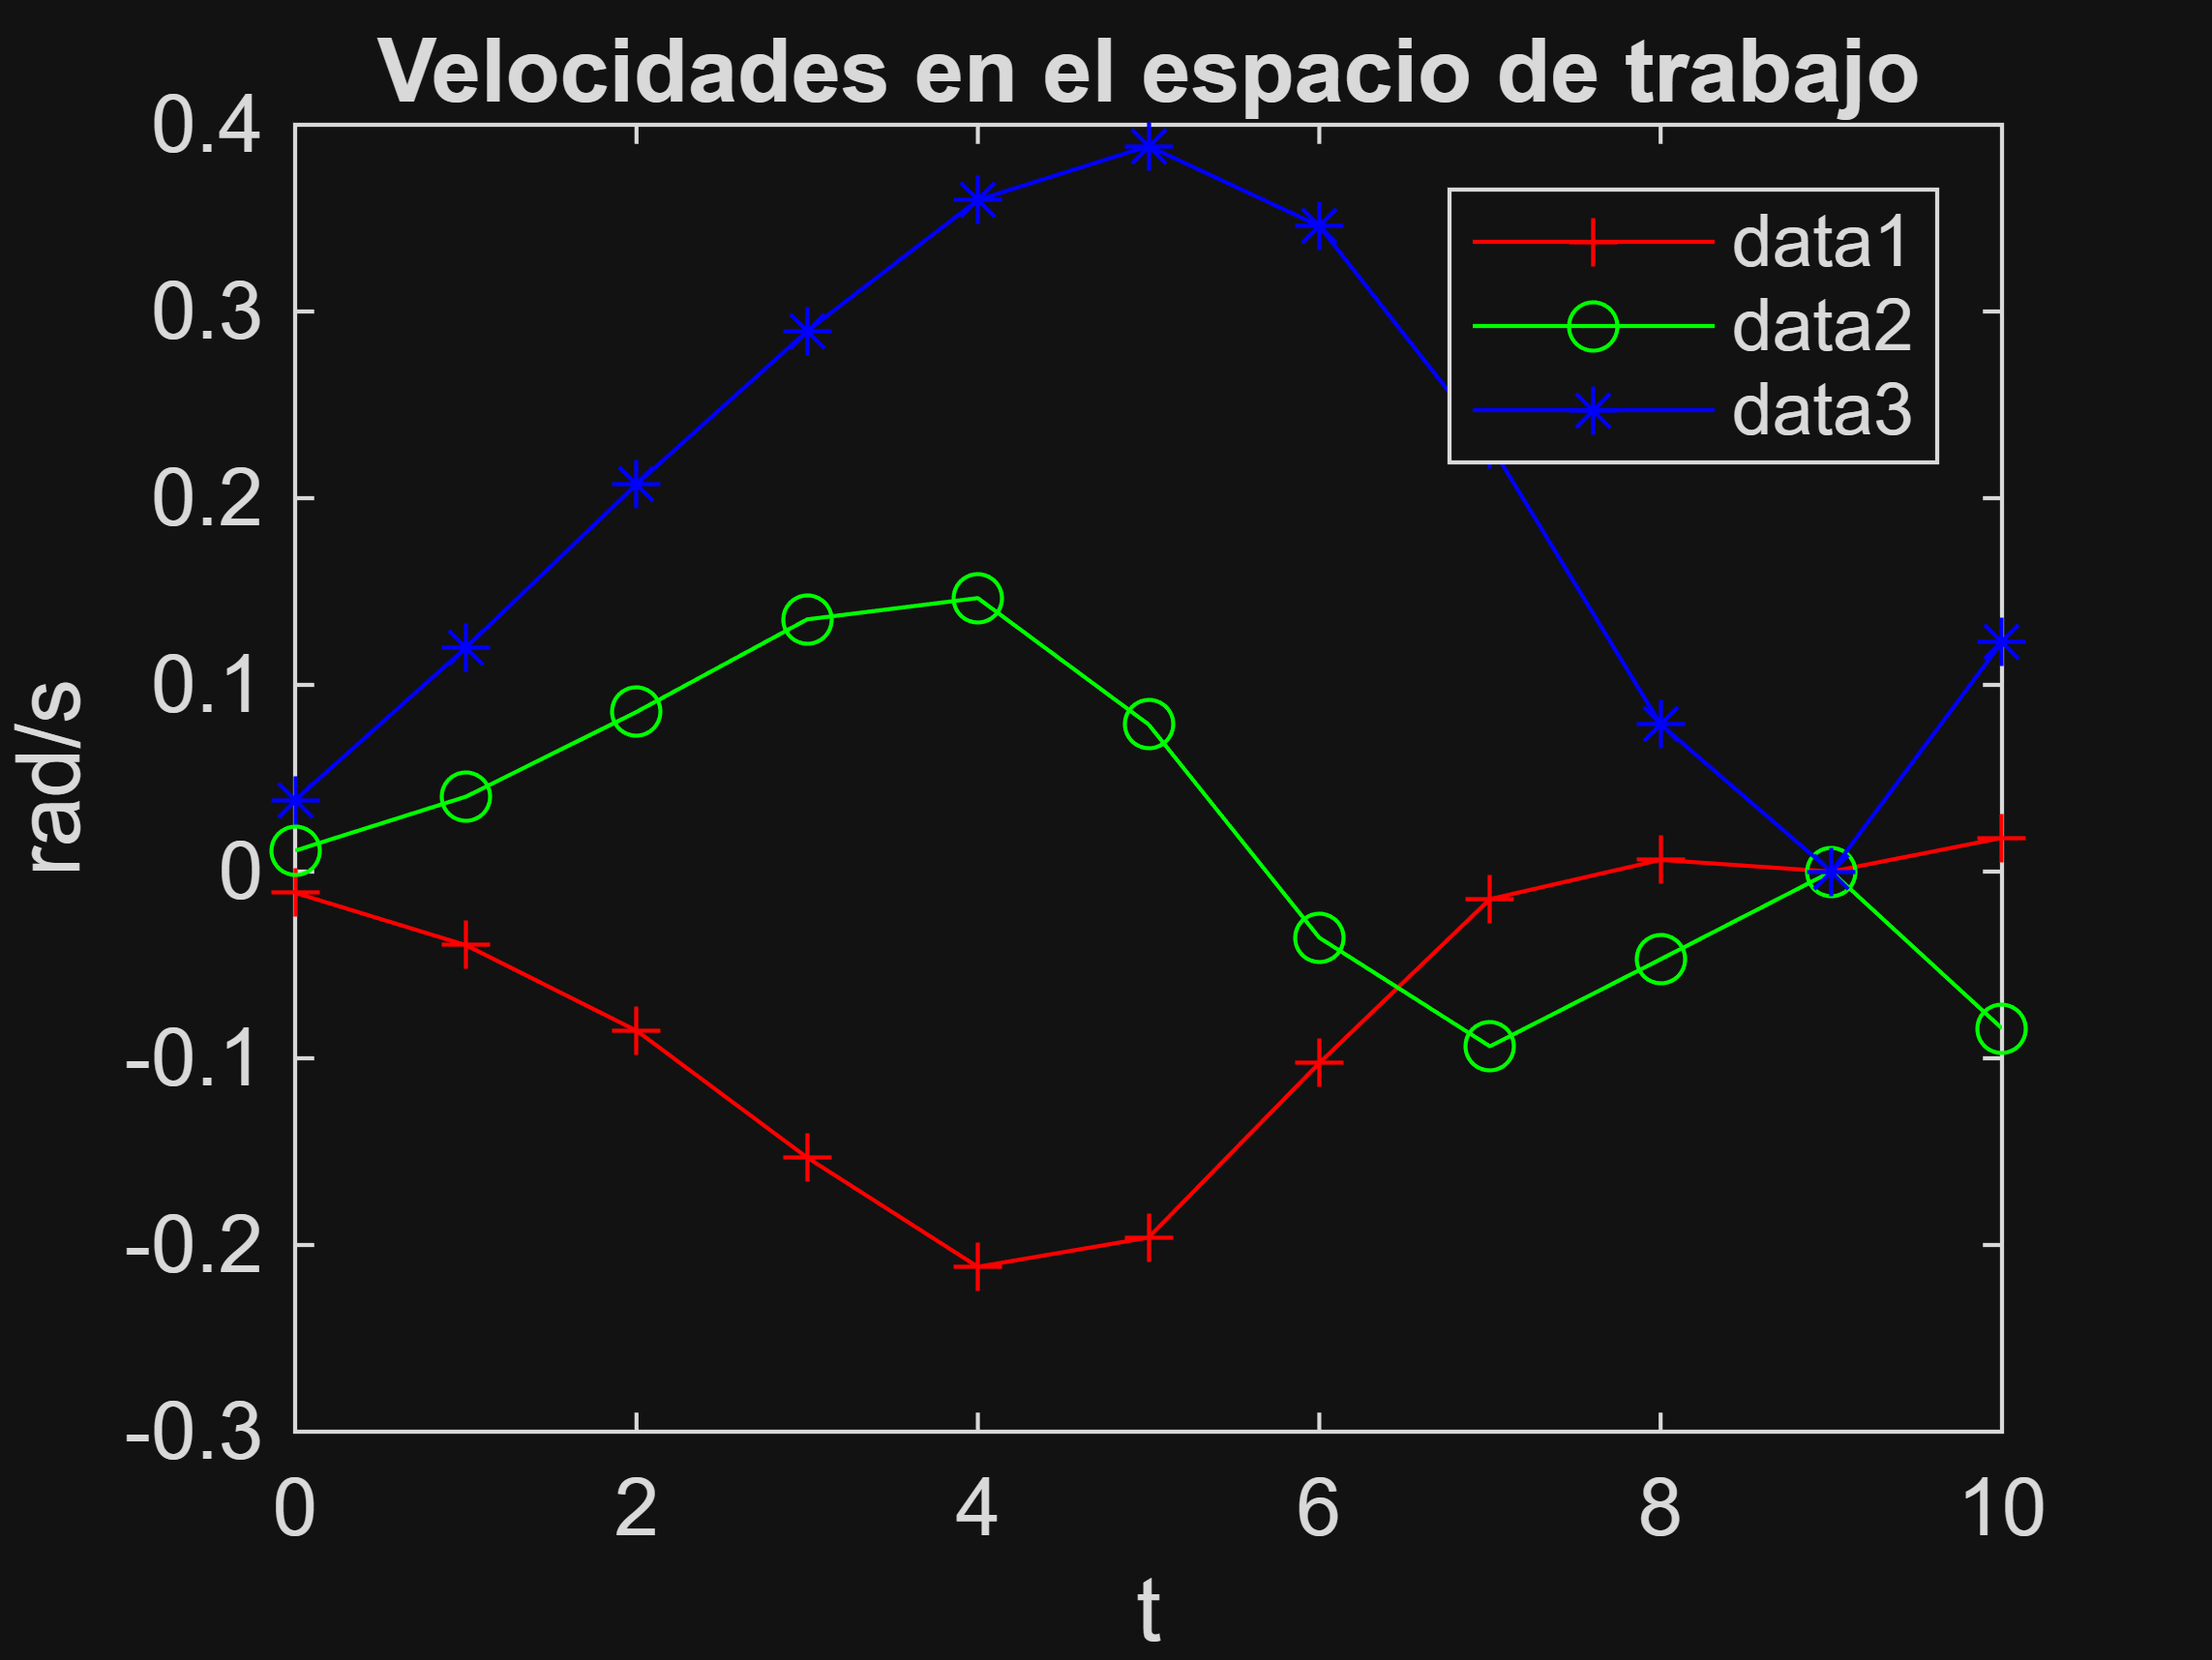

In [15]:
tf = 10;
for i=1:tf+1
    t = i;
    %Velocidad en el espacio del trabajo
    x_P_v(i) = ((30/tf^3)*t^2 - (60/tf^4)*t^3 + (30/tf^5)*t^4)*(x_fin-x_in);
    y_P_v(i) = ((30/tf^3)*t^2 - (60/tf^4)*t^3 + (30/tf^5)*t^4)*(y_fin-y_in);
    theta_P_v(i) = ((30/tf^3)*t^2 - (60/tf^4)*t^3 + (30/tf^5)*t^4)*(theta_fin-theta_in);

    x_dot = x_P_v(i);
    y_dot = y_P_v(i);
    theta_dot_P = theta_P_v(i);

    %Se considera el valor de posición de cada junta
    theta_O_1 = theta_1_tray(i);
    theta_1_2 = theta_2_tray(i);
    theta_2_3 = theta_3_tray(i);

    %Cálculo de las velocidades considerando la propagación de velocidades
    theta_1_v(i) = (x_dot*cos(theta_1_2 + theta_O_1))/(L1*sin(theta_1_2)) + (y_dot*sin(theta_1_2 + theta_O_1))/(L1*sin(theta_1_2)) + (L3*theta_dot_P*sin(theta_2_3))/(L1*sin(theta_1_2));
    theta_2_v(i) = - (x_dot*(L2*cos(theta_1_2 + theta_O_1) + L1*cos(theta_O_1)))/(L1*L2*sin(theta_1_2)) - (y_dot*(L2*sin(theta_1_2 + theta_O_1) + L1*sin(theta_O_1)))/(L1*L2*sin(theta_1_2)) - (L3*theta_dot_P*(L1*sin(theta_1_2 + theta_2_3) + L2*sin(theta_2_3)))/(L1*L2*sin(theta_1_2));
    theta_3_v(i) = (theta_dot_P*(L3*sin(theta_1_2 + theta_2_3) + L2*sin(theta_1_2)))/(L2*sin(theta_1_2)) + (x_dot*cos(theta_O_1))/(L2*sin(theta_1_2)) + (y_dot*sin(theta_O_1)/(L2*sin(theta_1_2)));
end

%Se grafican las velocidades del robot
figure;
plot(tsim, theta_1_v, 'r-+');
hold on;
plot(tsim, theta_2_v, 'g-o');
plot(tsim, theta_3_v, 'b-*');

hold off;
legend
title("Velocidades en el espacio de trabajo")
xlabel("t")
ylabel("rad/s")


La gráfica muestra un comportamiento fluido y sin exigencias al inicio de la secuencia, a pesar de elevarse la velocidad en ciertos puntos, pero al final se encuentran perturbaciones y cambios más bruscos que pueden llegar a afectar la función del robot. A pesar de ello, por la dimensión y valor de los valores registrados se considera que el robot tiene la capacidad de desplazarse con estas velocidades sin tener mayores complicaciones.

### Evaluación de las capacidades del robot respecto a la manipulabilidad

El índice de manipulabilidad $w$ es una métrica escalar que sirve como un diagnóstico cinemático para predecir la calidad del seguimiento de trayectorias. Esta medida nos permite saber si el robot es capaz e proyectar velocidades sobre el espacio de trabajo según la configuración o posición en la que se encuentre. Con los valores de manipulabilidad en cada instante de tiempo tenemos una perspectiva cualitativa que nos permite interpretar y decidir si el robot tiene la capacidad de seguir la trayectoria que le estamos especificando y no entrar o quedar cerca del algún punto de inflexión.



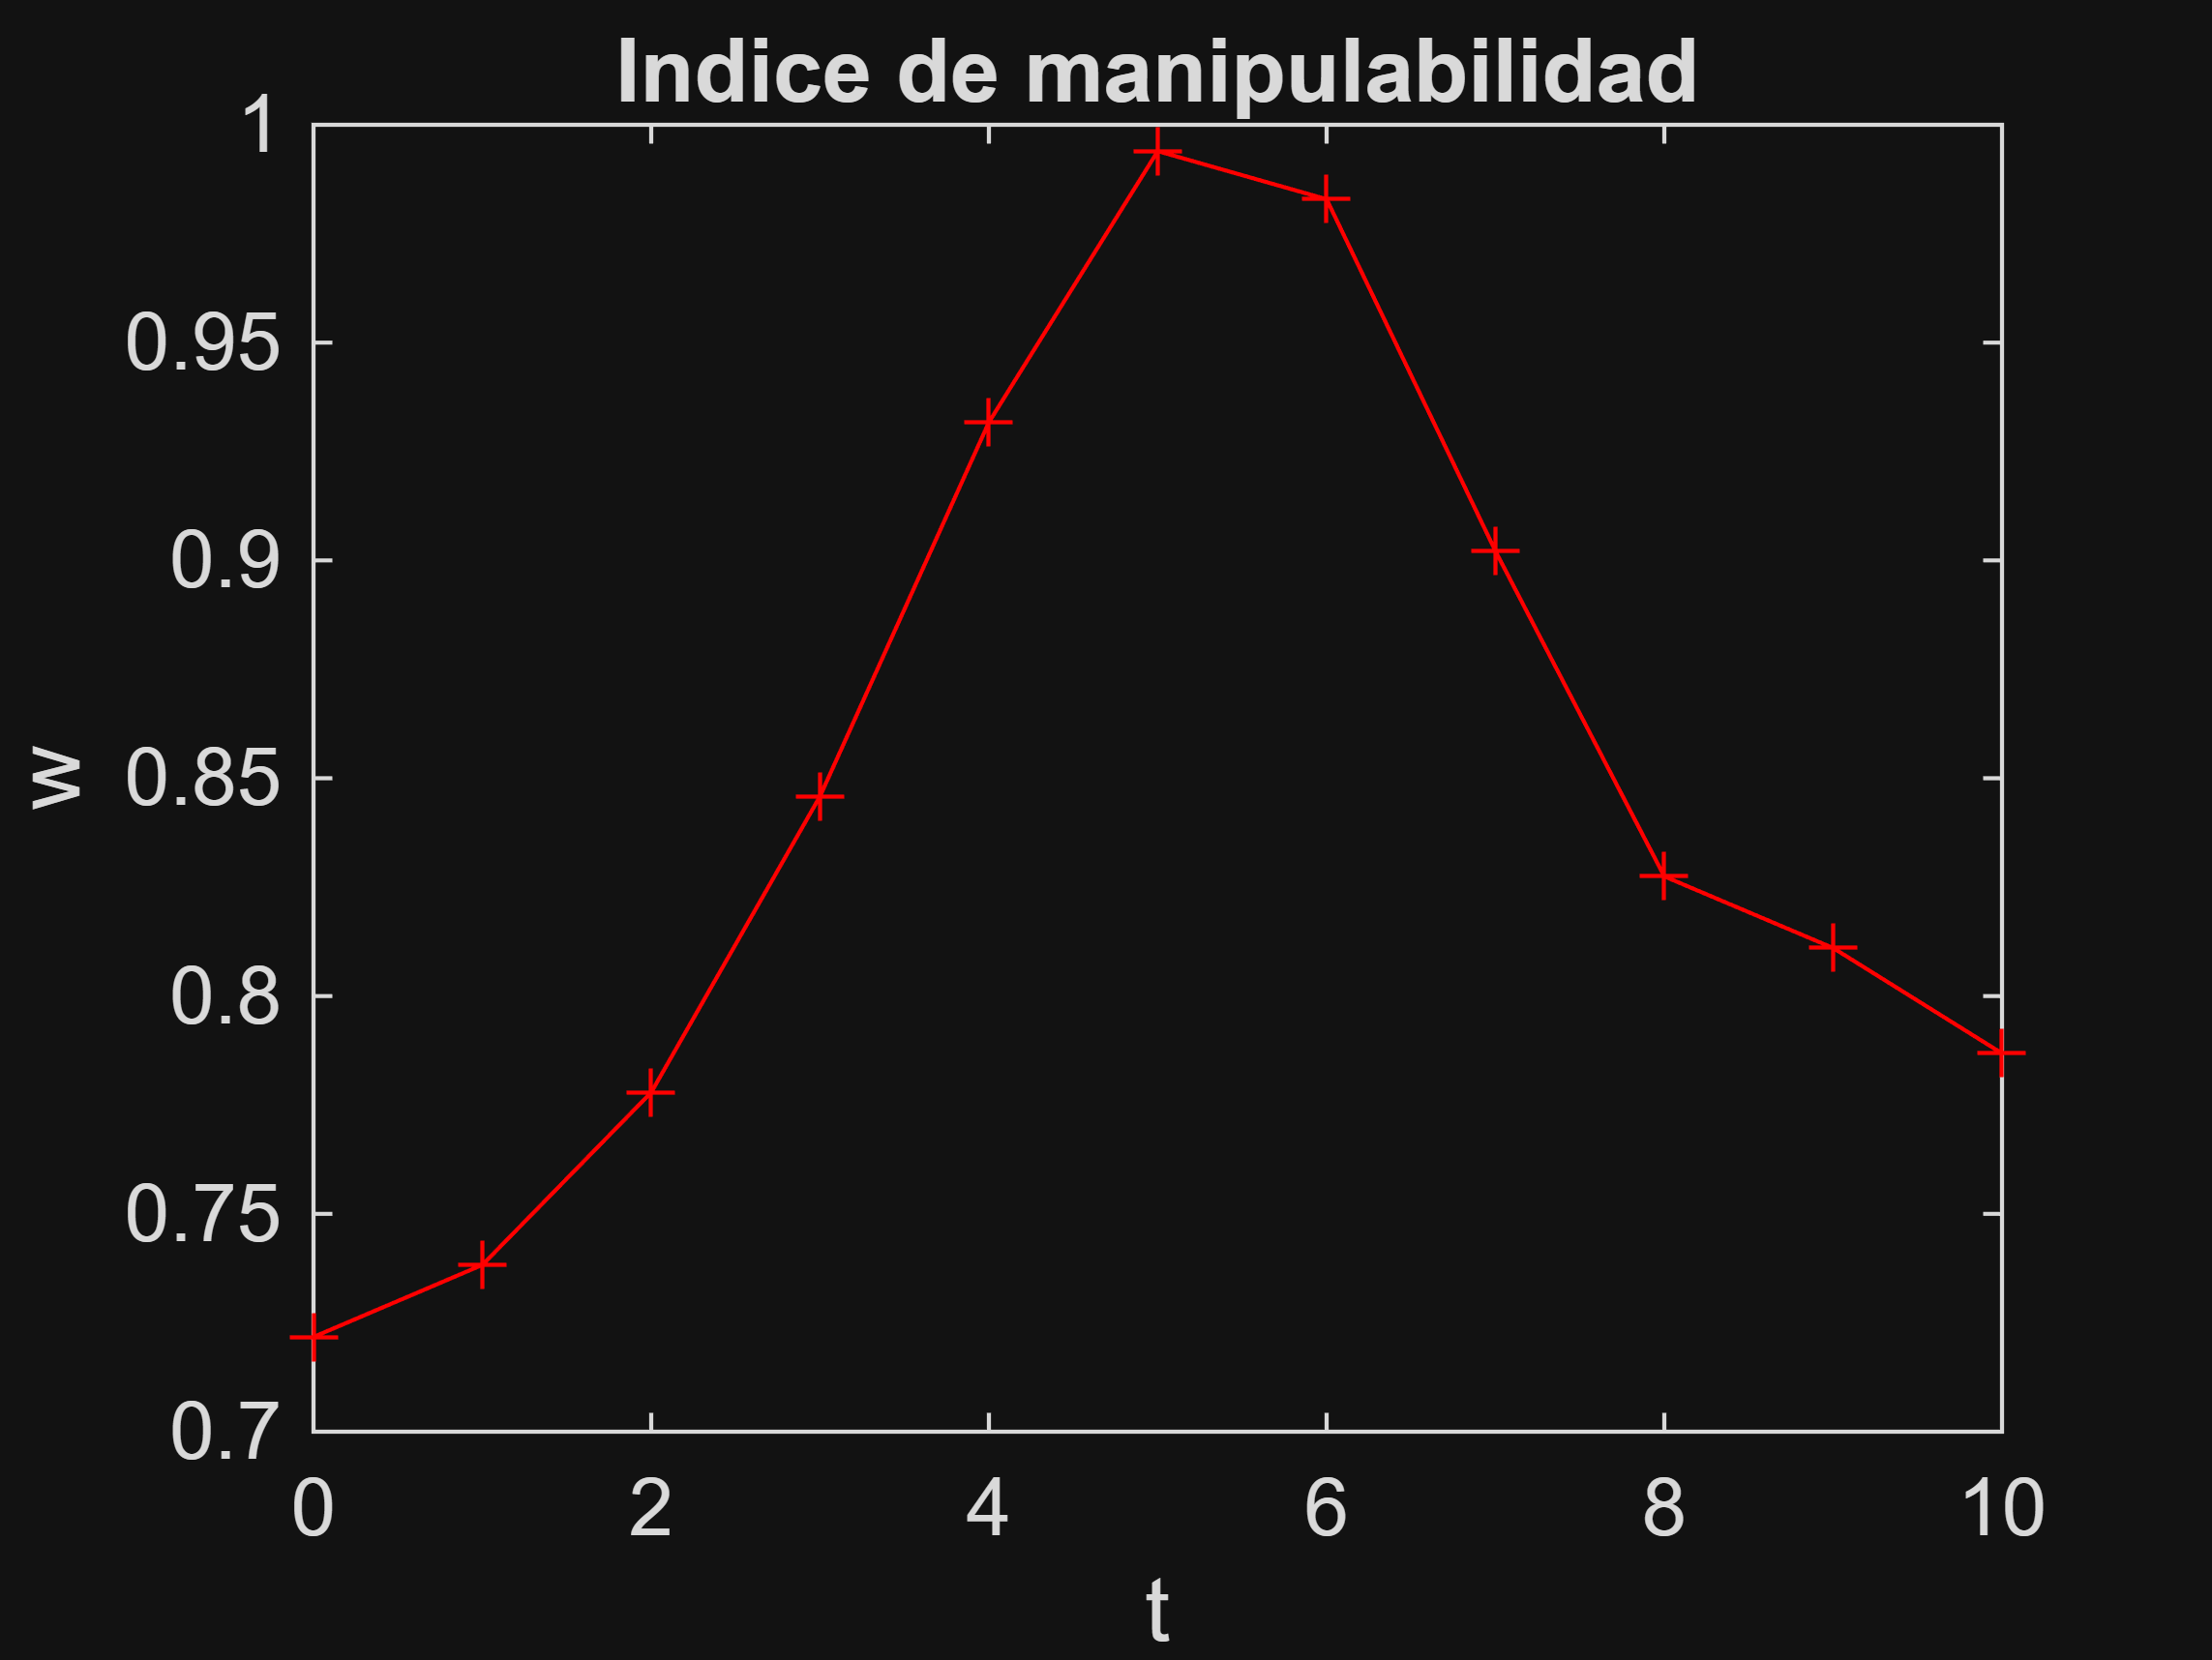

In [16]:
for i=1:tf+1
    %Obtención del valor de manipulabilidad en cada instante de tiempo
    w(i) = L1*L2*sin(theta_2_tray(i))/(L1*L2);

end
%Se grafica los vales obtenidos
figure;
plot(tsim, w , 'r-+');
title("Indice de manipulabilidad")
xlabel("t")
ylabel("w")


Como se puede observar, la manipulabilidad se mantiene en todo momento sobre un valor de 0.7, indicando que el robot está siempre en un estado lejano a un punto de inflexión y es capaz de proyectar las velocidades de las juntas hacia su efector final. Con esta forma podemos

### Evaluación de la capacidad del robot respecto al par de sus actuadores

Como se menciona anteriormente, la manipulabilidad es una característica cualitativa que nos permite conocer la calidad de seguimiento de trayectorias, pero este indice es una métrica escalar derivada de la Matriz Jacobiana $J\left(q\right)$ del robot, la cual relaciona las velocidades articulares con las velocidades del efector final mediante $\dot{\xi} =J\left(q\right)\dot{q}$. Para un robot SCARA, la manipulabilidad se define como el valor absoluto del determinante de la matriz Jacobiana, pero existe una segunda relación con la matriz Jacobiana y el par de los actuadores. Con esta relación podemos entonces relacionar la manipulabilidad con una característica cuantitativa que nos permita conocer si los actuadores implementados en el robot son capaces de transmitir la fuerza para que el efector final pueda interactuar con el entorno de la forma que queremos. Para tener estra evaluación se requiere del cálculo de los pares del robot, para ello se utiliza el modelo dinámico expresado a continuación:

 $ $ \begin{array}{l} \left(\begin{array}{c} {\ddot{\theta} }_{O,1} \,{\left(\frac{\cos \left(\theta_{1,2} \right)}{4}+\frac{{\sigma_{12} }^2 }{2}+\frac{{\sigma_{14} }^2 }{2}+\frac{27}{8}\right)}-{\dot{\theta} }_{2,3} \,{\left(\frac{\sigma_{18} \,\sigma_{10} }{16}-\frac{\sigma_{16} \,\sigma_{11} }{16}+\frac{\sigma_{12} \,\sigma_4 }{2}-\frac{\sigma_5 \,\sigma_{14} }{2}\right)}+{\ddot{\theta} }_{1,2} \,\sigma_3 +{\ddot{\theta} }_{2,3} \,\sigma_6 -{\dot{\theta} }_{1,2} \,{\left(\sigma_8 -\frac{\sigma_{14} \,\sigma_2 }{2}+\frac{\sigma_1 \,\sigma_{12} }{2}-\sigma_9 +\frac{{\dot{\theta} }_{1,2} \,\sin \left(\theta_{1,2} \right)}{8}+\frac{{\dot{\theta} }_{O,1} \,\sin \left(\theta_{1,2} \right)}{4}\right)}\newline \frac{{{\dot{\theta} }_{O,1} }^2 \,\sin \left(\theta_{1,2} \right)}{8}-{\dot{\theta} }_{2,3} \,{\left(\frac{\sigma_{18} \,\sigma_{10} }{16}-\frac{{\left(\frac{\sigma_{18} }{8}+\sigma_{19} \right)}\,\sigma_5 }{2}+\frac{{\left(\frac{\sigma_{16} }{8}+\sigma_{17} \right)}\,\sigma_4 }{2}-\frac{\sigma_{16} \,\sigma_{11} }{16}\right)}+{\ddot{\theta} }_{2,3} \,\sigma_7 +\frac{\sigma_{10} \,\sigma_1 }{2}+{\ddot{\theta} }_{O,1} \,\sigma_3 -\frac{\sigma_{11} \,\sigma_2 }{2}+{\ddot{\theta} }_{1,2} \,{\left(\frac{{{\left(\frac{\sigma_{16} }{8}+\sigma_{17} \right)}}^2 }{2}+\frac{{{\left(\frac{\sigma_{18} }{8}+\sigma_{19} \right)}}^2 }{2}+\frac{33}{16}\right)}-{\dot{\theta} }_{1,2} \,{\left(\frac{{\left(\frac{\sigma_{16} }{8}+\sigma_{17} \right)}\,\sigma_1 }{2}-\frac{{\left(\frac{\sigma_{18} }{8}+\sigma_{19} \right)}\,\sigma_2 }{2}+\sigma_8 -\sigma_9 +\frac{{\dot{\theta} }_{O,1} \,\sin \left(\theta_{1,2} \right)}{8}\right)}+\frac{{\dot{\theta} }_{1,2} \,{\dot{\theta} }_{O,1} \,\sin \left(\theta_{1,2} \right)}{8}\newline {\ddot{\theta} }_{2,3} \,{\left(\frac{{\sigma_{16} }^2 }{128}+\frac{{\sigma_{18} }^2 }{128}+1\right)}-\frac{\sigma_5 \,\sigma_{11} }{2}+{\ddot{\theta} }_{1,2} \,\sigma_7 -{\dot{\theta} }_{2,3} \,{\left(\frac{\sigma_{18} \,\sigma_{10} }{16}-\frac{\sigma_{18} \,\sigma_5 }{16}-\frac{\sigma_{16} \,\sigma_{11} }{16}+\frac{\sigma_{16} \,\sigma_4 }{16}\right)}+{\dot{\theta} }_{1,2} \,{\left(\frac{\sigma_{18} \,\sigma_2 }{16}-\frac{\sigma_{18} \,\sigma_{10} }{16}-\frac{\sigma_{16} \,\sigma_1 }{16}+\frac{\sigma_{16} \,\sigma_{11} }{16}\right)}+{\ddot{\theta} }_{O,1} \,\sigma_6 +\frac{\sigma_{10} \,\sigma_4 }{2} \end{array}\right)\\
\mathrm{}\\
\textrm{where}\\
\mathrm{}\\
\;\;\sigma_1 =\frac{{\dot{\theta} }_{2,3} \,\sigma_{18} }{8}+\sigma_{15} +{\dot{\theta} }_{O,1} \,{\left(\frac{\sigma_{18} }{8}+\sigma_{19} \right)}\\
\mathrm{}\\
\;\;\sigma_2 =\sigma_{13} +{\dot{\theta} }_{O,1} \,{\left(\frac{\sigma_{16} }{8}+\sigma_{17} \right)}+\frac{{\dot{\theta} }_{2,3} \,\sigma_{16} }{8}\\
\mathrm{}\\
\;\;\sigma_3 =\frac{\cos \left(\theta_{1,2} \right)}{8}+\frac{{\left(\frac{\sigma_{16} }{8}+\sigma_{17} \right)}\,\sigma_{12} }{2}+\frac{{\left(\frac{\sigma_{18} }{8}+\sigma_{19} \right)}\,\sigma_{14} }{2}+\frac{33}{16}\\
\mathrm{}\\
\;\;\sigma_4 =\frac{{\dot{\theta} }_{1,2} \,\sigma_{18} }{8}+\frac{{\dot{\theta} }_{2,3} \,\sigma_{18} }{8}+\frac{{\dot{\theta} }_{O,1} \,\sigma_{18} }{8}\\
\mathrm{}\\
\;\;\sigma_5 =\frac{{\dot{\theta} }_{1,2} \,\sigma_{16} }{8}+\frac{{\dot{\theta} }_{2,3} \,\sigma_{16} }{8}+\frac{{\dot{\theta} }_{O,1} \,\sigma_{16} }{8}\\
\mathrm{}\\
\;\;\sigma_6 =\frac{\sigma_{16} \,\sigma_{12} }{16}+\frac{\sigma_{18} \,\sigma_{14} }{16}+1\\
\mathrm{}\\
\;\;\sigma_7 =\frac{\sigma_{16} \,{\left(\frac{\sigma_{16} }{8}+\sigma_{17} \right)}}{16}+\frac{\sigma_{18} \,{\left(\frac{\sigma_{18} }{8}+\sigma_{19} \right)}}{16}+1\\
\mathrm{}\\
\;\;\sigma_8 =\frac{{\left(\frac{\sigma_{18} }{8}+\sigma_{19} \right)}\,\sigma_{10} }{2}\\
\mathrm{}\\
\;\;\sigma_9 =\frac{{\left(\frac{\sigma_{16} }{8}+\sigma_{17} \right)}\,\sigma_{11} }{2}\\
\mathrm{}\\
\;\;\sigma_{10} =\sigma_{13} +\frac{{\dot{\theta} }_{2,3} \,\sigma_{16} }{8}+{\dot{\theta} }_{O,1} \,\sigma_{12} \\
\mathrm{}\\
\;\;\sigma_{11} =\frac{{\dot{\theta} }_{2,3} \,\sigma_{18} }{8}+{\dot{\theta} }_{O,1} \,\sigma_{14} +\sigma_{15} \\
\mathrm{}\\
\;\;\sigma_{12} =\frac{\sigma_{16} }{8}+\sigma_{17} +\frac{\cos \left(\theta_{O,1} \right)}{2}\\
\mathrm{}\\
\;\;\sigma_{13} ={\dot{\theta} }_{1,2} \,{\left(\frac{\sigma_{16} }{8}+\sigma_{17} \right)}\\
\mathrm{}\\
\;\;\sigma_{14} =\frac{\sigma_{18} }{8}+\sigma_{19} +\frac{\sin \left(\theta_{O,1} \right)}{2}\\
\mathrm{}\\
\;\;\sigma_{15} ={\dot{\theta} }_{1,2} \,{\left(\frac{\sigma_{18} }{8}+\sigma_{19} \right)}\\
\mathrm{}\\
\;\;\sigma_{16} =\cos \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right)\\
\mathrm{}\\
\;\;\sigma_{17} =\frac{\cos \left(\theta_{1,2} +\theta_{O,1} \right)}{2}\\
\mathrm{}\\
\;\;\sigma_{18} =\sin \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right)\\
\mathrm{}\\
\;\;\sigma_{19} =\frac{\sin \left(\theta_{1,2} +\theta_{O,1} \right)}{2}
\end{array} $ $


Cálculo de los pares del robot




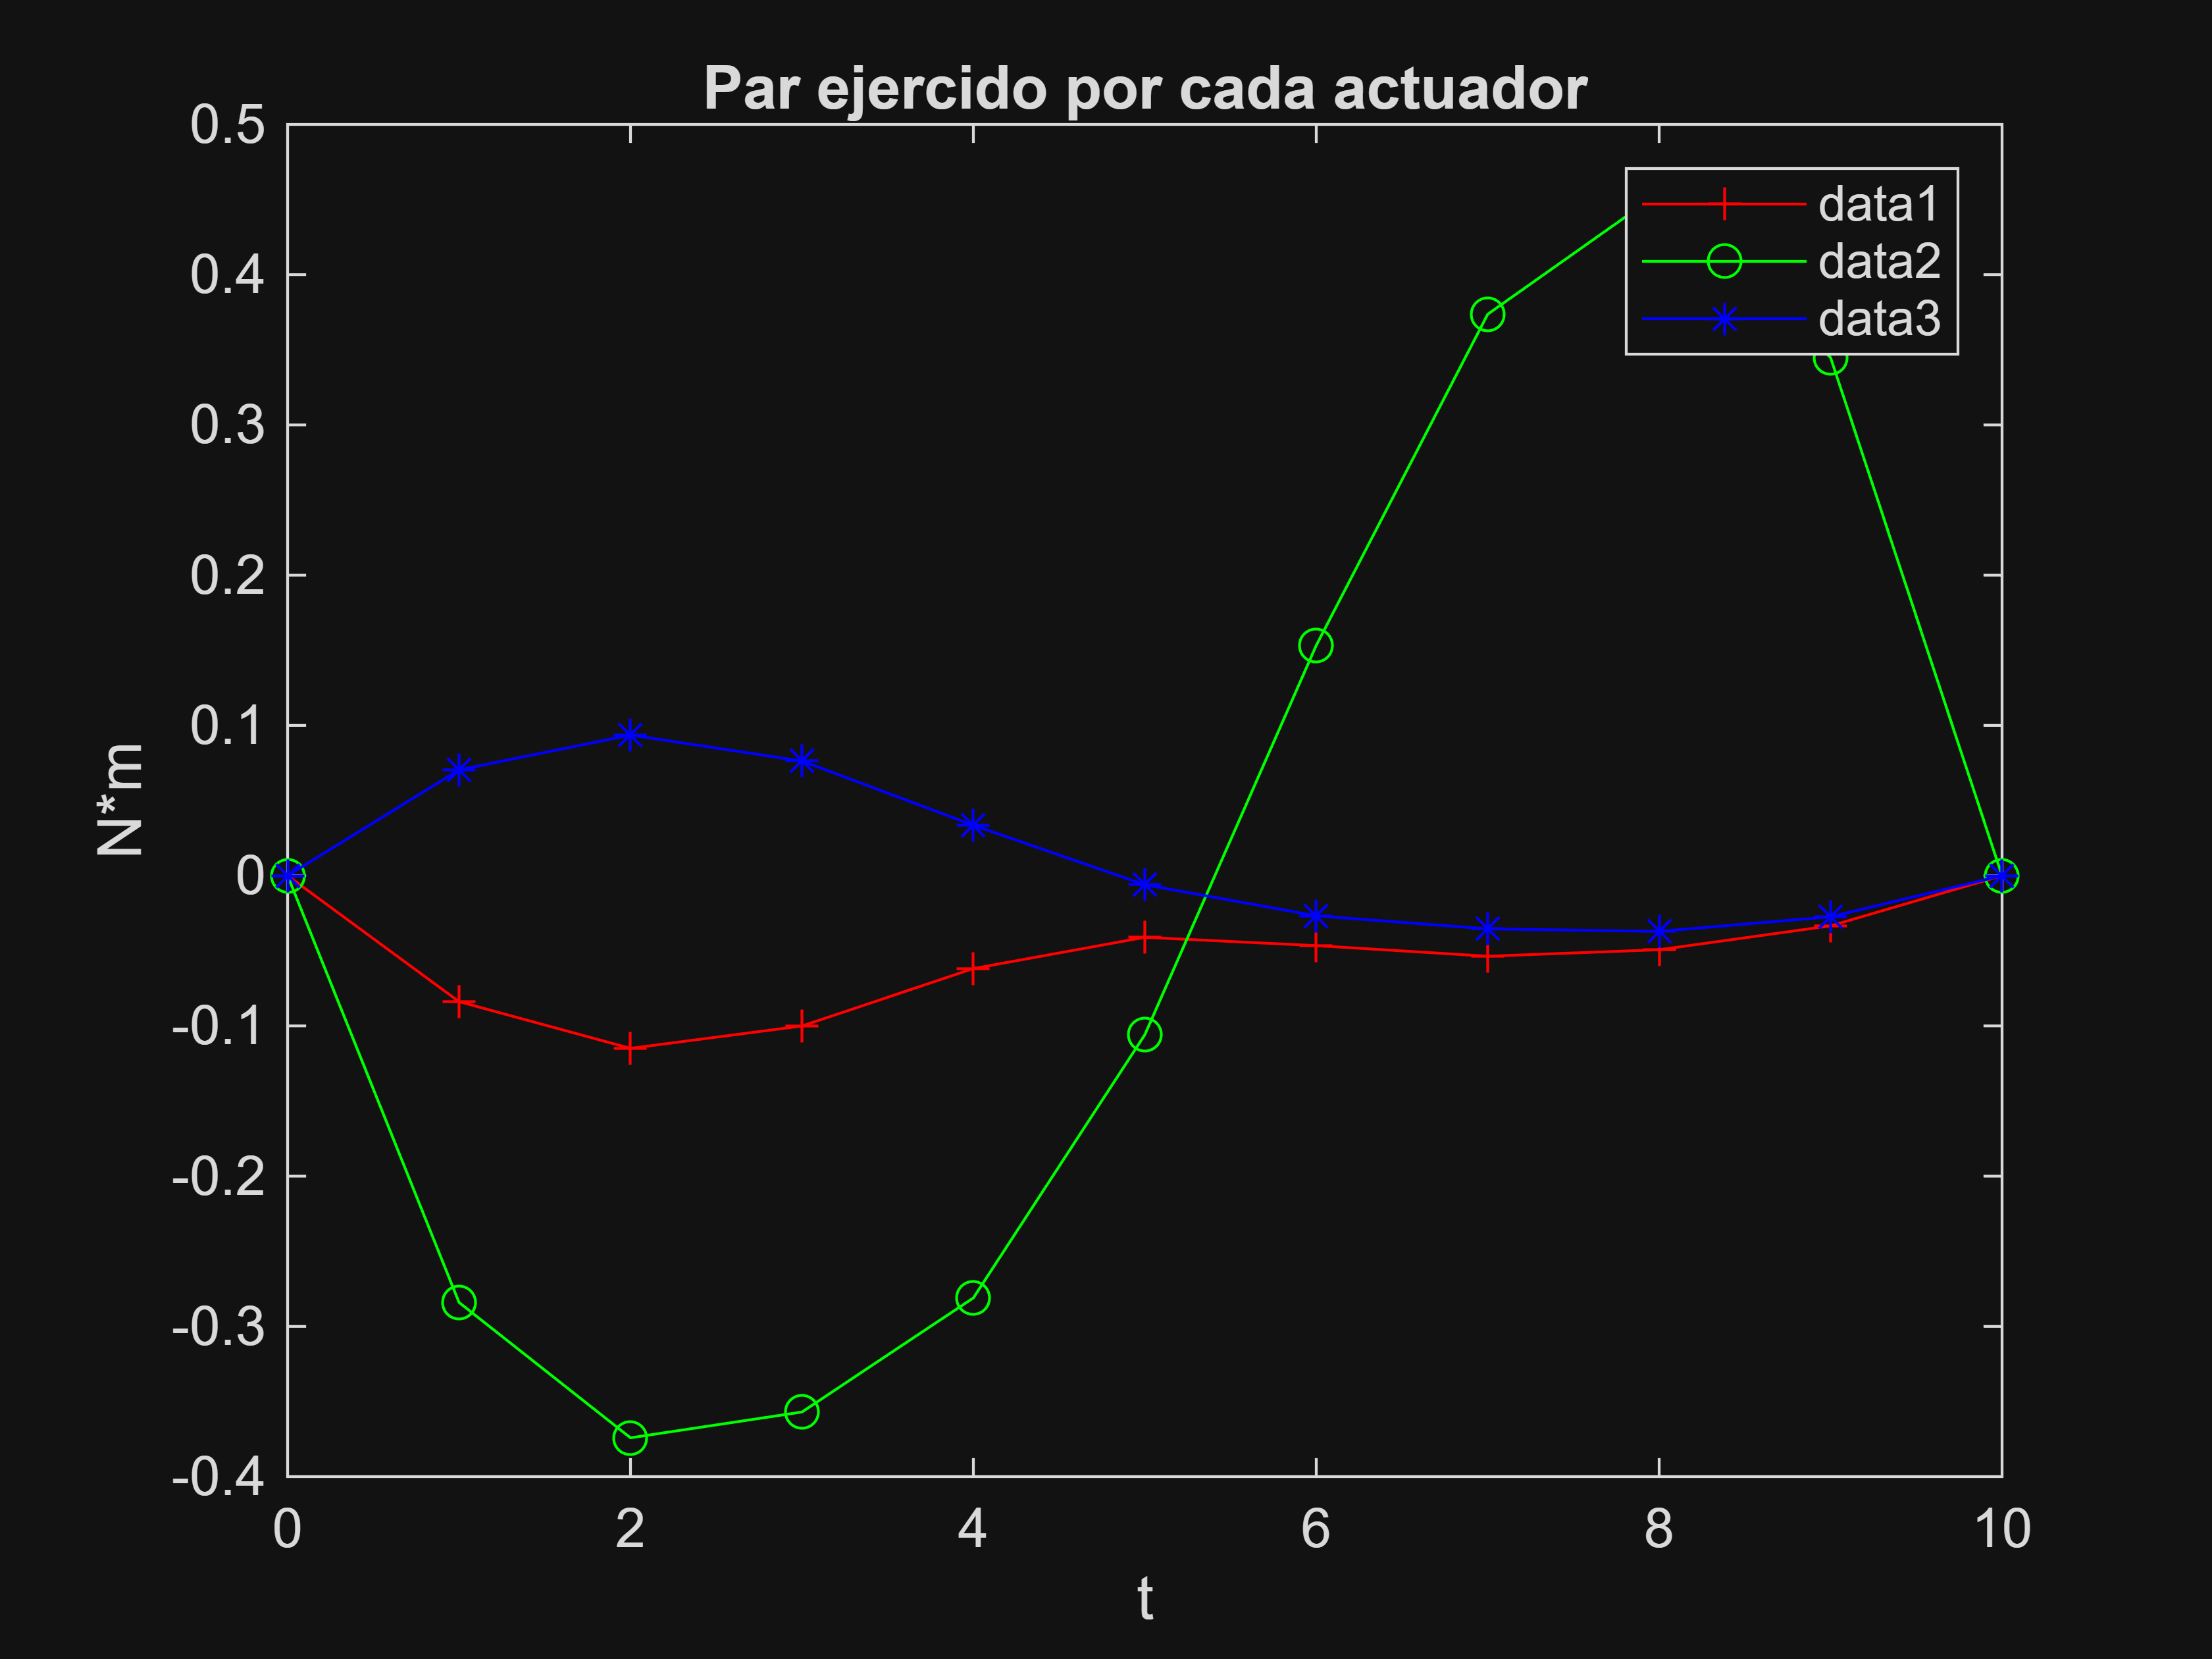

In [17]:
for i=1:tf+1
    %Se establecen valores de posición en cada tiempo
    theta_1 = theta_1_P(i);
    theta_2 = theta_2_P(i);
    theta_3 = theta_3_P(i);

    %Se establecen valores de velocidad en cada tiempo
    theta_1_vc = theta_1_P_v(i);
    theta_2_vc = theta_2_P_v(i);
    theta_3_vc = theta_3_P_v(i);

    %Se establecen valores de aceleración en cada tiempo
    theta_1_a = theta_1_P_a(i);
    theta_2_a = theta_2_P_a(i);
    theta_3_a = theta_3_P_a(i);

    %Variables de apoyo para el cálculo
    sigma_19 = sin(theta_2+theta_1)/2;
    sigma_18 = sin(theta_1+theta_2+theta_3);
    sigma_17 = cos(theta_2+theta_1)/2;
    sigma_16 = cos(theta_1+theta_2+theta_3);
    sigma_15 = theta_2_vc*(sigma_18/8 + sigma_19);
    sigma_14 = sigma_18/8 + sigma_19 + sin(theta_1)/2;
    sigma_13 = theta_2_vc *(sigma_16/8 +sigma_17);
    sigma_12 = sigma_16/8 +sigma_17 +cos(theta_1)/2;
    sigma_11 = theta_3_vc*sigma_18/8 + theta_1_vc*sigma_14 +sigma_15;
    sigma_10 = sigma_13 + theta_3_vc*sigma_16/8 +theta_1_vc*sigma_12;
    sigma_9 = ((sigma_16/8 + sigma_17)*sigma_11)/2;
    sigma_8 = ((sigma_18/8 + sigma_19)*sigma_10)/2;
    sigma_7 = (sigma_16*(sigma_16/8 + sigma_17))/16 + (sigma_18*(sigma_18/8 + sigma_19))/16 + 1;
    sigma_6 = sigma_16*sigma_12/16 + sigma_18*sigma_14 + 1;
    sigma_5 = theta_2_vc*sigma_16/8 + theta_3_vc*sigma_16/8 + theta_1_vc*sigma_16/8;
    sigma_4 = theta_2_vc*sigma_18/8 + theta_3_vc*sigma_18/8 + theta_1_vc*sigma_18/8;
    sigma_3 = cos(theta_2)/8 + ((sigma_16/8 + sigma_17)*sigma_12)/2 + ((sigma_18/8 + sigma_19)*sigma_14)/2 + 33/16;
    sigma_2 = sigma_13 +theta_1_vc*(sigma_16/8 + sigma_17) + theta_3_vc*sigma_16/8;
    sigma_1 = theta_3_vc*sigma_18/8 + sigma_15 +theta_1_vc*(sigma_18/8 + sigma_19);

    %Cálculo de los pares de torsión en cada junta para cada instante de
    %tiempo
    tao_1_c(i) = theta_1_a*(cos(theta_2)/4 + sigma_12^2/2 + sigma_14^2/2 + 27/8) - theta_3_vc* (sigma_18*sigma_10/16 - sigma_16*sigma_11/16 + sigma_12*sigma_4/2 - sigma_5*sigma_14/2) + theta_2_a*sigma_3 + theta_3_a*sigma_6 - theta_2_vc*(sigma_8 - sigma_14*sigma_2/2 + sigma_1*sigma_12/2 - sigma_9 + theta_2_vc*sin(theta_2)/8 + theta_1_vc*sin(theta_2)/4);
    tao_2_c(i) = theta_1_vc^2*sin(theta_2)/8 - theta_3_vc*(sigma_18*sigma_10 - ((sigma_18/8 + sigma_19)*sigma_5)/2 + ((sigma_16/8 + sigma_17)*sigma_4)/2 - sigma_16*sigma_11/16) + theta_2_a*sigma_7 + sigma_10*sigma_1/2 + theta_1_a*sigma_3 - sigma_11*sigma_2/2 + theta_2_a*(((sigma_16 + sigma_17)^2)/2 + ((sigma_18 + sigma_19)^2)/2 + 33/16) - theta_2_vc*((sigma_16/8 + sigma_17)*sigma_1/2 + (sigma_18/8 + sigma_19)*sigma_2/2 + sigma_8 - sigma_9 + theta_1_vc*sin(theta_2)/8) + theta_2_vc*theta_1_vc*sin(theta_2)/8;
    tao_3_c(i) = theta_3_a*(sigma_16^2/128 + sigma_18^2/128 + 1 ) - sigma_5*sigma_11/2 + theta_2_a*sigma_7 - theta_3_vc*(sigma_18*sigma_10/16 - sigma_18*sigma_5/16 - sigma_16*sigma_11/16 + sigma_16*sigma_4/16) + theta_2_vc*(sigma_18*sigma_2/16 - sigma_18*sigma_10/16 - sigma_16*sigma_1/16 + sigma_16*sigma_11/16) + theta_1_a*sigma_6 + sigma_10*sigma_4/2;

end

figure;
plot(tsim, tao_1_c, 'r-+');
hold on;
plot(tsim, tao_2_c, 'g-o');
plot(tsim, tao_3_c, 'b-*');
hold off;
legend
title("Par ejercido por cada actuador")
xlabel("t")
ylabel("N*m")


Con estos resultados observamos que los motores utilizados deben tener un par de 0.5 Nm, tener actuadores con ese par suele aumentar mucho el tamaño del motor, por lo que una opción más viable para conseguir ese tipo de acción es utilizar motorreductores. Otro factor importante es que no requieren cambios significativos o grandes saltos en el par a lo largo del tiempo, siendo el segundo actuador el que más varia, pero sin tener pendientes ni picos de energía exagerados.


Finalmente, con el par obtenido de cada motor, podemos obtener la potencia que se requiere para que el robot pueda efectuar la trayectoria que le estamos asignando, para ello se multiplica la velocidad de giro de cada junta por el par ejercido sobre ella. Esta evaluación es de igual importancia para tener un adecuado diseño y distribución de energía que permita un correcto funcionamiento del robot y así mismo nos dé a conocer el potencial de trabajo que este conlleva.



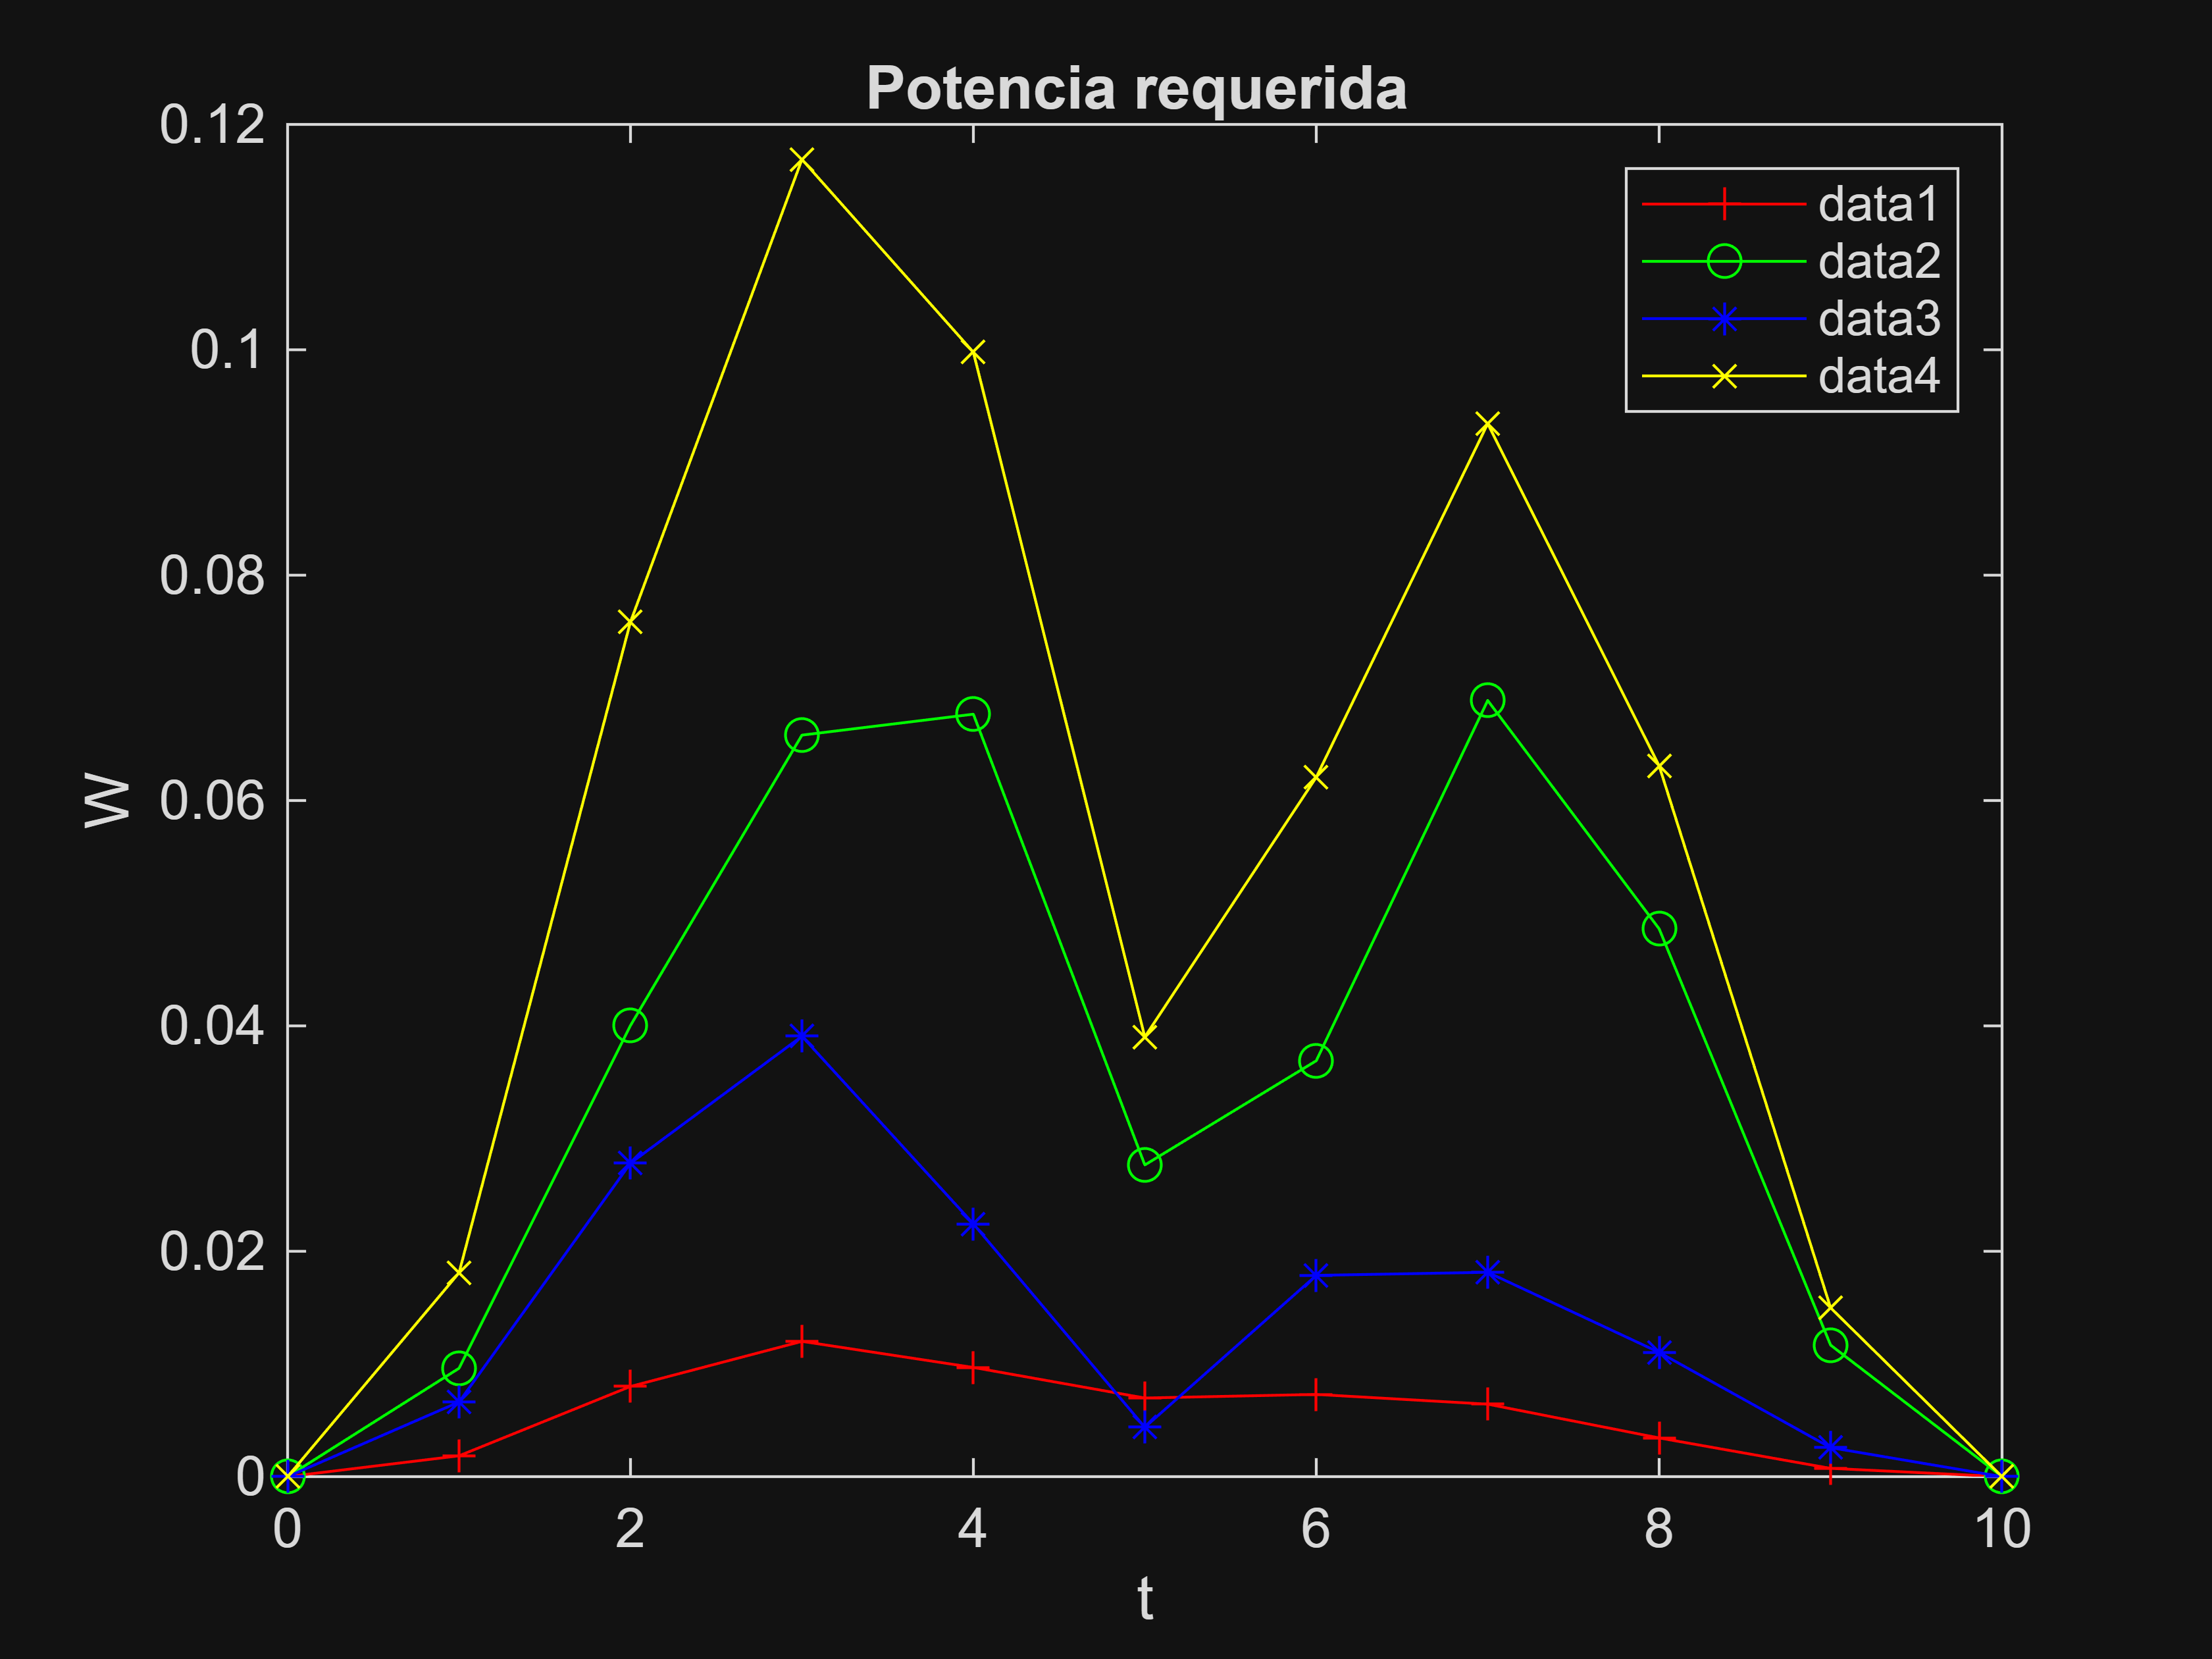

In [18]:

for i=1:tf+1
    pot_1(i) = abs(tao_1_c(i)*theta_1_P_v(i));
    pot_2(i) = abs(tao_2_c(i)*theta_2_P_v(i));
    pot_3(i) = abs(tao_3_c(i)*theta_3_P_v(i));
    pot_total(i) = pot_1(i) + pot_2(i) + pot_3(i);

end

figure;
plot(tsim, pot_1, 'r-+');
hold on;
plot(tsim, pot_2, 'g-o');
plot(tsim, pot_3, 'b-*');
plot(tsim, pot_total, 'y-x');
hold off;
legend
title("Potencia requerida ")
xlabel("t")
ylabel("W")


La potencia requerida por el robot igualmente es mínima, aunque para la distribución o alimentación eleçtrica de los actuadores se debe tener en cuenta el factor de eficiencia, un detalle a considerar al momento de diseñar el robot. Los momentos en los que la potencia baja son oportunidades para recuperar o recolectar energía con un sistema recuperativo, de esta forma se aprovechan los puntos máximos de consumo de energía y la diferencia de cuando se deja de utilizar dicha potencia.

## Conclusiones

**Islas Escobar Alejandro**


El análisis completo de las capacidades de un robot SCARA para el seguimiento de trayectorias demanda un enfoque en dos partes importantes. En primer lugar, un análisis cinemático, centrado en el índice de manipulabilidad, es fundamental para validar la viabilidad de la trayectoria en el espacio de trabajo. Este análisis previene que el robot alcance configuraciones singulares o cercanas a singularidades, puntos críticos donde se pierde el control cinemático, se generan velocidades articulares excesivas y se compromete la precisión del efector final.


En segundo lugar, y de igual importancia, se requiere un análisis dinámico detallado que determine las demandas reales sobre los actuadores. Este estudio calcula los perfiles de torque y potencia necesarios en cada articulación para ejecutar la trayectoria planificada. Solo así se puede garantizar que el sistema de accionamiento posea la capacidad suficiente para suministrar las fuerzas y pares requeridos, asegurando no solo la viabilidad cinemática sino también la posibilidad dinámica del movimiento.


**Mujica Zeballos Carla**


El presente trabajo ha demostrado que la evaluación de un robot SCARA para el seguimiento de trayectorias óptimas requiere una perspectiva dual. Por un lado, el análisis cinemático, centrado en el índice de manipulabilidad, considera la destreza del robot y previene el paso por configuraciones singulares críticas. Por otro lado, el análisis dinámico, determina los perfiles de torque y potencia en los actuadores, y con ello verificamos la viabilidad física del movimiento bajo los límites del sistema.


La integración de ambos enfoques proporciona una visión integral e indispensable del rendimiento real del robot. Esta metodología establece un marco riguroso que va más allá de la simulación básica y predecir el comportamiento en condiciones de trabajo reales. En consecuencia, se convierte en la base para garantizar que el robot SCARA pueda operar de manera eficiente, precisa y confiable, explotando al máximo las capacidades de su espacio de trabajo designado.

